# Coffee Sales Data Analysis

Project Description:

This project is focused on analyzing the coffee sales data. This project aims to find data-driven solutions to improve coffee business by generating actionable insights from the data by understanding the sales and product performance, customer preference by coffee type, customer behaviour and purchasing patterns, and coffee shopping trends over the time.

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
coffee_data = pd.read_csv("index.csv")
coffee_data.head(5)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [3]:
#Understanding the data
coffee_data.shape

(1133, 6)

There are 1133 records and 6 columns in the dataset. The dataset spans from the start of March 2024 to the end of July 2024, capturing daily transaction data.

In [4]:
coffee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [5]:
coffee_data.describe()

,money
count,1133.000000
mean,33.105808
std,5.035366
min,18.120000
25%,28.900000
50%,32.820000
75%,37.720000
max,40.000000


# Data Cleaning and Preprocessing

In [6]:
# Convert date and datetime columns
coffee_data['date'] = pd.to_datetime(coffee_data['date'])
coffee_data['datetime'] = pd.to_datetime(coffee_data['datetime'])

In [7]:
coffee_data.dtypes

date           datetime64[ns]
datetime       datetime64[ns]
cash_type              object
card                   object
money                 float64
coffee_name            object
dtype: object

In [8]:
#Changing some column names for better understanding of the data
coffee_data = coffee_data.rename(columns={'date': 'transaction_date','cash_type': 'payment_type','money': 'transaction_amount'})

In [9]:
coffee_data.head(2)

,transaction_date,datetime,payment_type,card,transaction_amount,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate


In [10]:
coffee_data.tail(2)

,transaction_date,datetime,payment_type,card,transaction_amount,coffee_name
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte
1132,2024-07-31,2024-07-31 21:55:16.570,card,ANON-0000-0000-0446,32.82,Latte


In [11]:
#checking duplicates if any
coffee_data.duplicated().sum()

0

In [12]:
# Check Missing Values
coffee_data.isnull().sum()

transaction_date       0
datetime               0
payment_type           0
card                  89
transaction_amount     0
coffee_name            0
dtype: int64

There are 89 null values in the card column.

In [13]:
# Handling the missing values
coffee_data['card'] = coffee_data['card'].fillna('CASH_USER')

As the card column contains the customer ids of the card user customers, the other missing values are the customers who used cash as the purchasing medium. So these missing values are filled with 'CASH_USER'.

In [14]:
coffee_data.isnull().sum()

transaction_date      0
datetime              0
payment_type          0
card                  0
transaction_amount    0
coffee_name           0
dtype: int64

There are no more missing values.

In [15]:
# Feature Engineering
coffee_data['hour'] = coffee_data['datetime'].dt.hour
coffee_data['day'] = coffee_data['transaction_date'].dt.day
coffee_data['day_name'] = coffee_data['transaction_date'].dt.day_name()
coffee_data['month_name'] = coffee_data['transaction_date'].dt.month_name()
coffee_data['quarter'] = coffee_data['transaction_date'].dt.quarter
coffee_data['year'] = coffee_data['transaction_date'].dt.year

In [16]:
coffee_data.head(3)

,transaction_date,datetime,payment_type,card,transaction_amount,coffee_name,hour,day,day_name,month_name,quarter,year
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,10,1,Friday,March,1,2024
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,1,Friday,March,1,2024
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,1,Friday,March,1,2024


There are 4 quarters in a year. January, February, and March belong to quarter 1. April, May, and June belong to quarter 2. July, August, and September belong to quarter 3. October, November, and December belong to quarter 4.  

Now the data cleaning and preprocessing is over. Next we are going to do Exploratory Data Analysis.

# Exploratory Data Analysis( EDA)

In [17]:
#Check the time range of this dataset
[coffee_data['transaction_date'].min(),coffee_data['transaction_date'].max()]

[Timestamp('2024-03-01 00:00:00'), Timestamp('2024-07-31 00:00:00')]

The time range of this data set is from 2023-3-1 to 2024-7-31. The transaction details of purchased coffee products in this date range is given in the dataset.

In [19]:
#Check the number of unique values in each column
coffee_data.nunique()

transaction_date       150
datetime              1133
payment_type             2
card                   447
transaction_amount      16
coffee_name              8
hour                    16
day                     31
day_name                 7
month_name               5
quarter                  3
year                     1
dtype: int64

In [20]:
total_revenue = coffee_data['transaction_amount'].sum()
total_transactions = len(coffee_data)
avg_transaction = coffee_data['transaction_amount'].mean()
unique_customers = coffee_data['card'].nunique()


print(f"  • Total Revenue: ${total_revenue:,.2f}")
print(f"  • Total Transactions: {total_transactions:,}")
print(f"  • Average Transaction Value: ${avg_transaction:.2f}")
print(f"  • Unique Card Customers: {unique_customers}")

  • Total Revenue: $37,508.88
  • Total Transactions: 1,133
  • Average Transaction Value: $33.11
  • Unique Card Customers: 447


In [21]:
coffee_data.loc[:,['payment_type','card','coffee_name']].describe().T

,count,unique,top,freq
payment_type,1133,2,card,1044
card,1133,447,CASH_USER,89
coffee_name,1133,8,Americano with Milk,268


In [22]:

coffee_data['payment_type'].value_counts()

card    1044
cash      89
Name: payment_type, dtype: int64

In [23]:
coffee_data['card'].value_counts()

CASH_USER              89
ANON-0000-0000-0012    88
ANON-0000-0000-0009    63
ANON-0000-0000-0097    27
ANON-0000-0000-0003    23
                       ..
ANON-0000-0000-0196     1
ANON-0000-0000-0195     1
ANON-0000-0000-0193     1
ANON-0000-0000-0190     1
ANON-0000-0000-0446     1
Name: card, Length: 447, dtype: int64

In [24]:
coffee_data['coffee_name'].value_counts()

Americano with Milk    268
Latte                  243
Cappuccino             196
Americano              169
Cortado                 99
Hot Chocolate           74
Espresso                49
Cocoa                   35
Name: coffee_name, dtype: int64

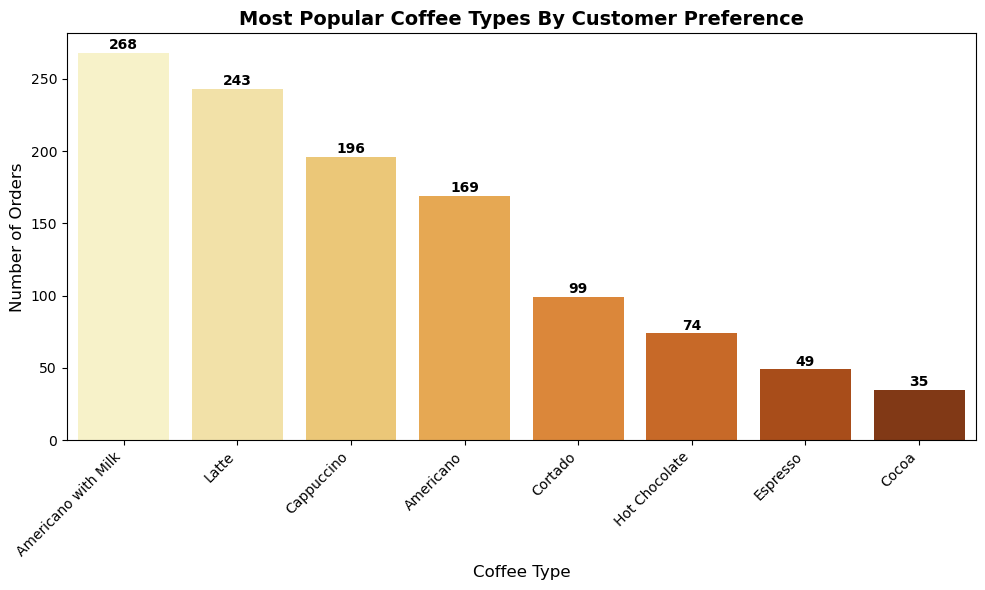

In [25]:
#Most Popular Coffee Types By Customer Preference
coffee_counts =coffee_data['coffee_name'].value_counts()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=coffee_counts.index, y=coffee_counts.values, palette='YlOrBr')


for i, v in enumerate(coffee_counts.values):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.title('Most Popular Coffee Types By Customer Preference', fontsize=14, fontweight='bold')
plt.xlabel('Coffee Type', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The most preferred coffee type is Americano with Milk followed by Latte. The least preferred coffee type by customers is Cocoa.

**Distribution of Payment Type**

In [26]:
payment_dist = coffee_data['payment_type'].value_counts()
print("\n PAYMENT TYPE DISTRIBUTION:")
for payment, count in payment_dist.items():
    percentage = (count / len(coffee_data)) * 100
    print(f"  • {payment.capitalize()}: {count} ({percentage:.1f}%)")


 PAYMENT TYPE DISTRIBUTION:
  • Card: 1044 (92.1%)
  • Cash: 89 (7.9%)


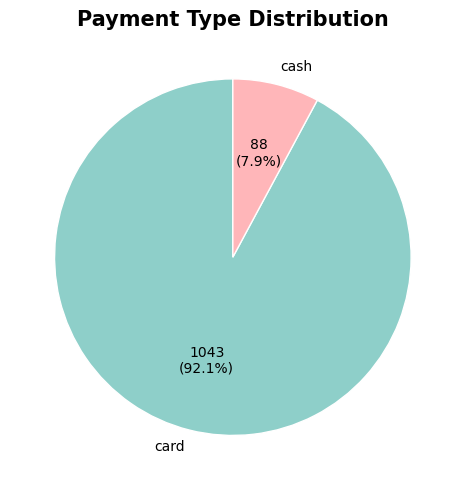

In [27]:
#Payment Type Distribution

payment_dist = coffee_data['payment_type'].value_counts()


plt.figure(figsize=(5,5))
plt.pie(
    payment_dist,
    labels=payment_dist.index,  
    autopct=lambda p: f'{int(p * sum(payment_dist)/100)}\n({p:.1f}%)',  
    startangle=90,
    colors=['#8ECFC9', '#FFB6B9'],
    wedgeprops={'edgecolor': 'white'}
)

plt.title("Payment Type Distribution", fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

Most customers prefer card as payment type. Only 7.9% transactions are using cash and the rest 92.1% transactions are using card.

In [71]:
coffee_data[['payment_type','coffee_name']].value_counts()

payment_type  coffee_name        
card          Americano with Milk    253
              Latte                  218
              Cappuccino             181
              Americano              155
              Cortado                 94
              Hot Chocolate           68
              Espresso                44
              Cocoa                   31
cash          Latte                   25
              Americano with Milk     15
              Cappuccino              15
              Americano               14
              Hot Chocolate            6
              Cortado                  5
              Espresso                 5
              Cocoa                    4
dtype: int64

The most preferred coffee type by card users are Americano with Milk. The most preferred coffee type by cash users are Latte.

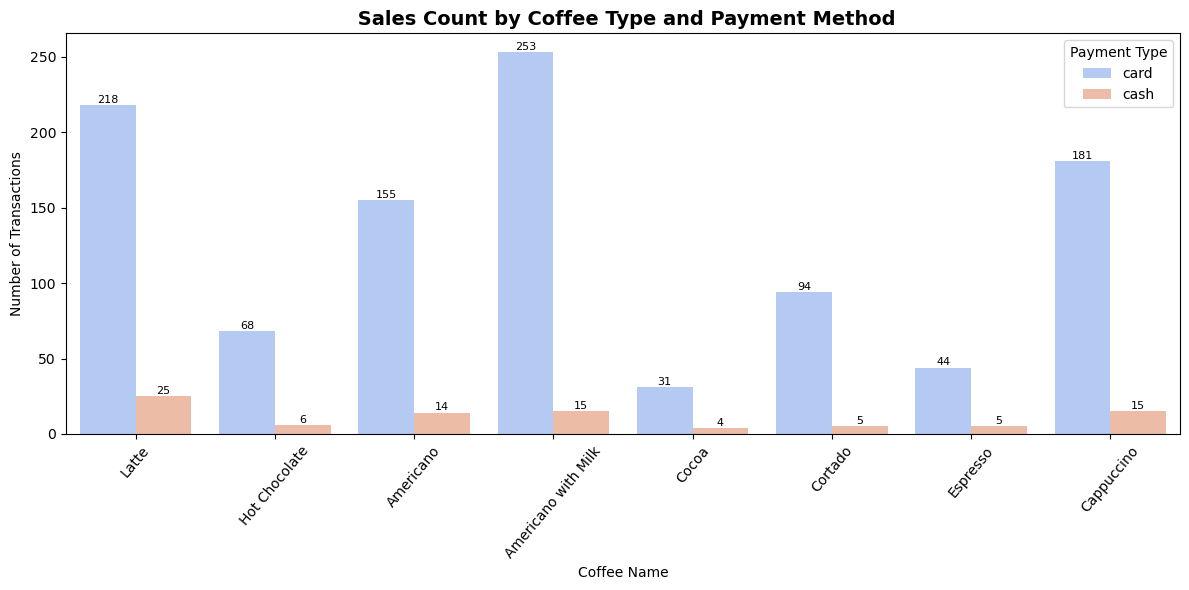

In [28]:
#Sales by Cofee type and payment type
plt.figure(figsize=(12,6))
ax = sns.countplot(
    data=coffee_data,
    x='coffee_name',
    hue='payment_type',
    dodge=True,
    palette='coolwarm'
)
plt.title(' Sales Count by Coffee Type and Payment Method', fontsize=14, fontweight='bold')
plt.xlabel('Coffee Name')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=50)
plt.legend(title='Payment Type')
plt.tight_layout()


for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 0.2,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=8
        )

plt.show()

In [72]:
pivot_table = coffee_data.pivot_table(values='transaction_amount', index='coffee_name', columns='payment_type', aggfunc='sum')
print(pivot_table)

payment_type            card   cash
coffee_name                        
Americano            4232.54  412.0
Americano with Milk  8083.94  518.0
Cappuccino           6738.14  595.0
Cocoa                1138.94  157.0
Cortado              2595.08  150.0
Espresso              976.62  124.0
Hot Chocolate        2539.48  239.0
Latte                8018.14  991.0


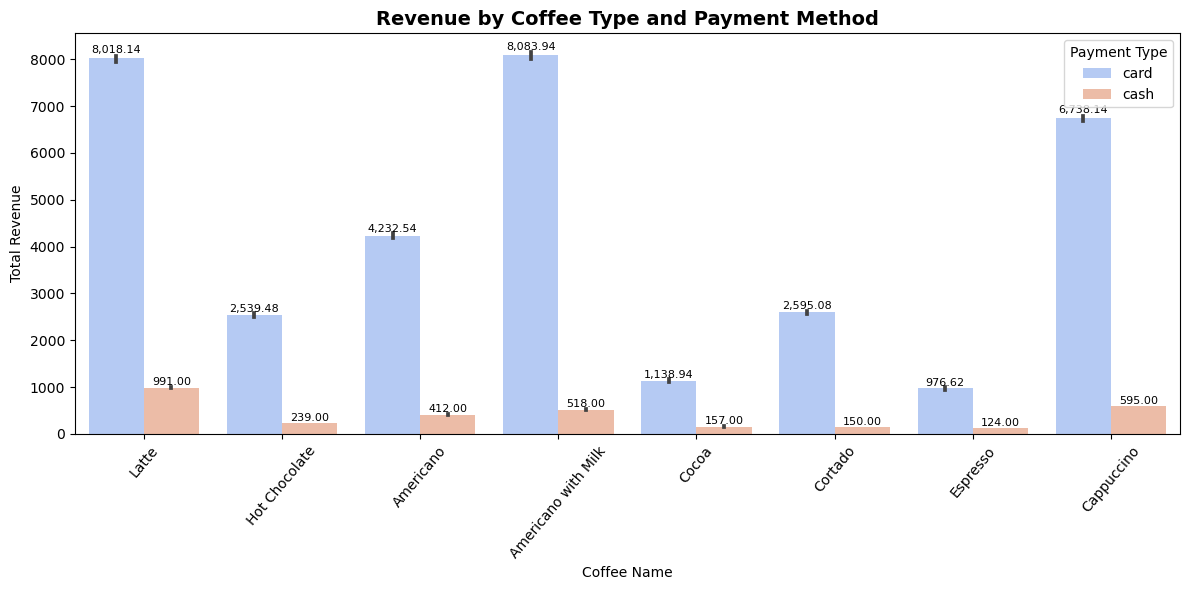

In [73]:
#Revenue by Cofee type and payment type
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=coffee_data,
    x='coffee_name',
    y='transaction_amount',
    hue='payment_type',
    dodge=True,
    palette='coolwarm',
    estimator=sum  
)

plt.title('Revenue by Coffee Type and Payment Method', fontsize=14, fontweight='bold')
plt.xlabel('Coffee Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=50)
plt.legend(title='Payment Type')
plt.tight_layout()


for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + (0.01 * height),  
            f'{height:,.2f}',          
            ha='center',
            va='bottom',
            fontsize=8
        )

plt.show()

Considering the card transactions, the coffee type which brought higher revenue is Americano with Milk. Considering the cash transactions, the coffee type which brought higher revenue is Latte.

In [30]:
# Total sales (count of transactions) by payment method
sales_by_payment = coffee_data.groupby('payment_type')['transaction_date'].count().reset_index()
sales_by_payment.columns = ['payment_type', 'total_sales']
print("Total Sales by Payment Method:")
print(sales_by_payment)

# Total revenue (sum of transaction amounts) by payment method
revenue_by_payment = coffee_data.groupby('payment_type')['transaction_amount'].sum().reset_index()
revenue_by_payment.columns = ['payment_type', 'total_revenue']
print("\nTotal Revenue by Payment Method:")
print(revenue_by_payment)

Total Sales by Payment Method:
  payment_type  total_sales
0         card         1044
1         cash           89

Total Revenue by Payment Method:
  payment_type  total_revenue
0         card       34322.88
1         cash        3186.00


Most revenue and sales are from transactions via card payment type.

**Analyzing Sales Trends Over Time**

1)Hourly Sales

In [31]:
hourly_sales =coffee_data.groupby(['hour']).count()['transaction_date'].reset_index().rename(columns={'transaction_date':'count'})
hourly_sales

,hour,count
0,7,13
1,8,44
2,9,50
3,10,133
4,11,103
5,12,87
6,13,78
7,14,76
8,15,65
9,16,77


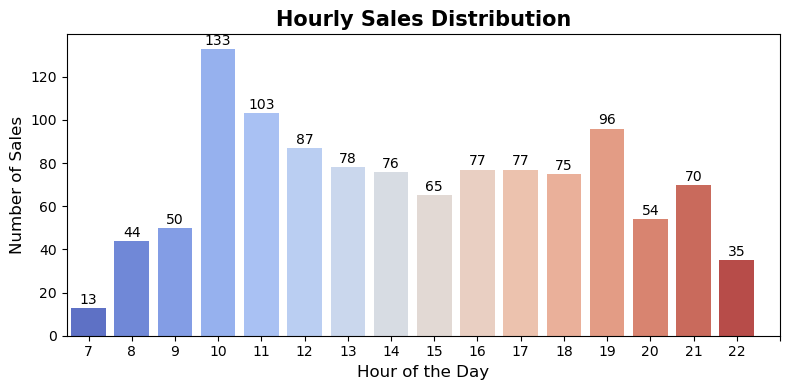

In [32]:
#Hourly Sales distribution
hourly_sales = coffee_data.groupby('hour').size()

plt.figure(figsize=(8, 4))
ax = sns.barplot(x=hourly_sales.index, y=hourly_sales.values, palette='coolwarm')


for i, v in enumerate(hourly_sales.values):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10, fontweight='normal')

plt.title('Hourly Sales Distribution', fontsize=15, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.xticks(range(0, 17))
plt.tight_layout()
plt.show()

In [33]:
# Peak Hours Analysis
print("\n PEAK SALES HOURS:")
peak_hours = coffee_data.groupby('hour').size().sort_values(ascending=False).head(3)
for hour, count in peak_hours.items():
    print(f"  • {hour}:00 - {count} sales")


 PEAK SALES HOURS:
  • 10:00 - 133 sales
  • 11:00 - 103 sales
  • 19:00 - 96 sales


Peak sales hours are 10,11, and 19. Least sales hours are 7,22, and 8. This means the sales are less during early morning and late night.

2)Daily Sales

In [34]:
coffee_data['transaction_date'].value_counts()

2024-07-30    24
2024-07-31    22
2024-05-20    17
2024-07-26    16
2024-05-23    16
              ..
2024-07-13     2
2024-05-08     1
2024-07-17     1
2024-07-15     1
2024-04-27     1
Name: transaction_date, Length: 150, dtype: int64

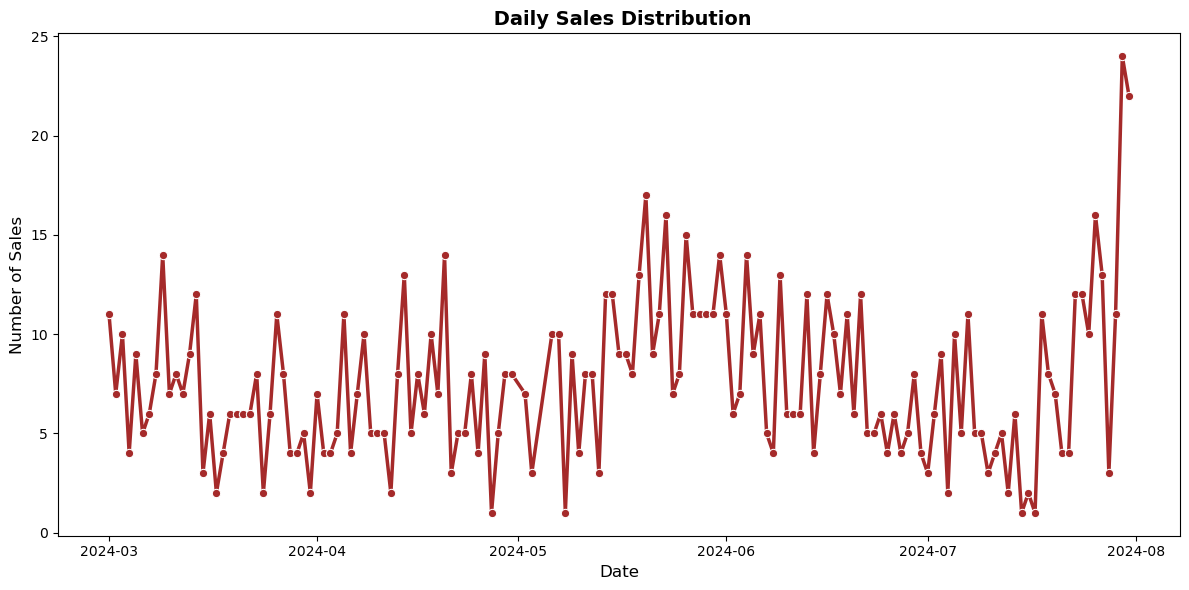

In [35]:
# Daily Sales Distribution
daily_sales = coffee_data.groupby('transaction_date').size().reset_index(name='sales_count')


plt.figure(figsize=(12,6))
sns.lineplot(x='transaction_date', y='sales_count', data=daily_sales, color='brown', linewidth=2.5, marker='o')

plt.title(' Daily Sales Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.tight_layout()
plt.show()

In [80]:
# Count total sales per transaction_date
daily_sales_count = coffee_data.groupby('transaction_date').size().reset_index(name='sales_count')

# Date with highest sales
max_sales_date = daily_sales_count.loc[daily_sales_count['sales_count'].idxmax()]

# Date with lowest sales
min_sales_date = daily_sales_count.loc[daily_sales_count['sales_count'].idxmin()]

print("Date with highest sales:")
print(max_sales_date)

print("\nDate with lowest sales:")
print(min_sales_date)

Date with highest sales:
transaction_date    2024-07-30 00:00:00
sales_count                          24
Name: 148, dtype: object

Date with lowest sales:
transaction_date    2024-04-27 00:00:00
sales_count                           1
Name: 57, dtype: object


Sales have increased by the end of July.

3) Weekday Sales

In [36]:
weekday_sales =coffee_data.groupby(['day_name']).count()['transaction_date'].reset_index().rename(columns={'transaction_date':'count'})
weekday_sales

,day_name,count
0,Friday,163
1,Monday,151
2,Saturday,154
3,Sunday,151
4,Thursday,164
5,Tuesday,185
6,Wednesday,165


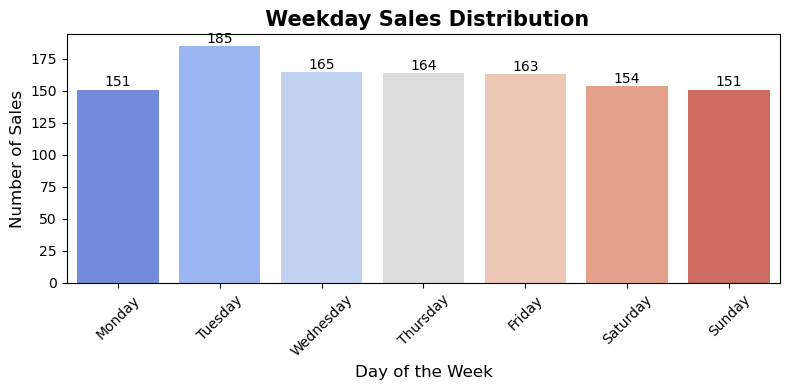

In [37]:
#Weekday Sales Distribution
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


weekday_sales = coffee_data.groupby('day_name').size().reindex(weekday_order)

plt.figure(figsize=(8, 4))
ax = sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette='coolwarm')


for i, v in enumerate(weekday_sales.values):
    ax.text(i, v + 0.2, str(v), ha='center', va='bottom', fontsize=10, fontweight='normal')

plt.title(' Weekday Sales Distribution', fontsize=15, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
# Best sales Day Analysis
print("\n BEST SALES DAYS:")
best_days = coffee_data.groupby('day_name').size().sort_values(ascending=False).head(3)
for day, count in best_days.items():
    print(f"  • {day}: {count} sales")


 BEST SALES DAYS:
  • Tuesday: 185 sales
  • Wednesday: 165 sales
  • Thursday: 164 sales


Sales are highest from Tuesday to Thursday, which shows that people buy more coffee during their regular workdays.
Sales drop on Monday and Sunday, likely because people start the week slowly on Monday and stay at home or relax on Sunday.
This indicates that coffee purchases are mainly driven by work-week routines rather than weekend leisure.

4) Monthly Sales

In [39]:
monthly_sales =coffee_data.groupby(['month_name']).count()['transaction_date'].reset_index().rename(columns={'transaction_date':'count'})
monthly_sales

,month_name,count
0,April,196
1,July,237
2,June,227
3,March,206
4,May,267


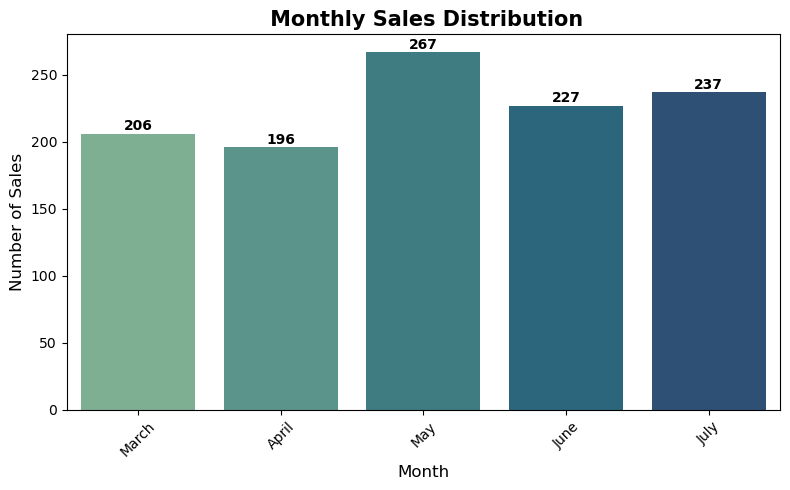

In [40]:
#Monthly Sales Distribution

month_order = ['March', 'April', 'May', 'June', 'July']


monthly_sales = (
    coffee_data.groupby('month_name')['transaction_date']
    .count()
    .reindex(month_order)
    .reset_index()
    .rename(columns={'transaction_date': 'sales_count'})
)


plt.figure(figsize=(8, 5))
ax = sns.barplot(x='month_name', y='sales_count', data=monthly_sales, palette='crest')


for i, v in enumerate(monthly_sales['sales_count']):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title(' Monthly Sales Distribution', fontsize=15, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Sales are highest in May and lowest in April. Sales also remain high in June and July. This may indicate a seasonal pattern. However, we do not have weather data to confirm whether this increase is due to rainy season effects. 

5)Quarterly Sales

In [41]:
quarterly_sales =coffee_data.groupby(['quarter']).count()['transaction_date'].reset_index().rename(columns={'transaction_date':'count'})
quarterly_sales

,quarter,count
0,1,206
1,2,690
2,3,237


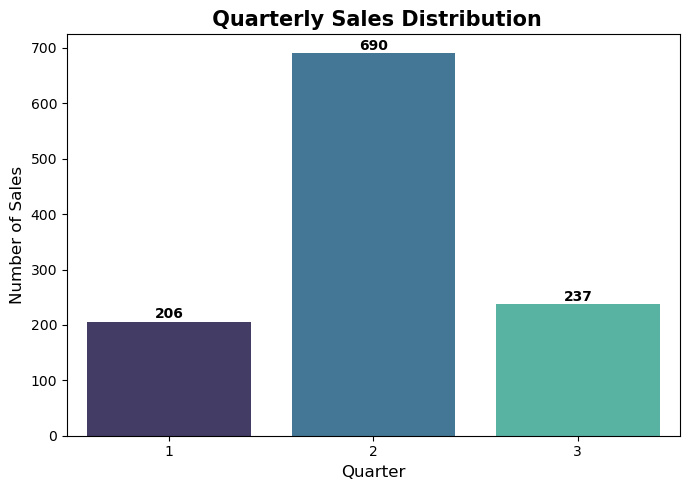

In [42]:
#Quarterly Sales Distribution

quarterly_sales = (
    coffee_data.groupby('quarter')['transaction_date']
    .count()
    .reset_index()
    .rename(columns={'transaction_date': 'sales_count'})
)


quarterly_sales = quarterly_sales.sort_values('quarter')


plt.figure(figsize=(7, 5))
ax = sns.barplot(x='quarter', y='sales_count', data=quarterly_sales, palette='mako')


for i, v in enumerate(quarterly_sales['sales_count']):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title(' Quarterly Sales Distribution', fontsize=15, fontweight='bold')
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.tight_layout()
plt.show()

Quarter 2( April-June) has highest sales. This indicates that coffee sales peak strongly during the middle of the year. April to June, which includes the summer period and the start of the rainy season. During this time, people are more active outside, workplaces operate at full capacity, and customers tend to buy more coffee.

6) Yearly Sales

In [43]:
yearly_sales =coffee_data.groupby(['year']).count()['transaction_date'].reset_index().rename(columns={'transaction_date':'count'})
yearly_sales

,year,count
0,2024,1133


**Analyzing Revenue Trends Over Time**

1) Hourly Revenue

In [44]:
hourly_revenue = (coffee_data.groupby('hour')['transaction_amount'].sum().reset_index().rename(columns={'transaction_amount': 'revenue'}))
hourly_revenue

,hour,revenue
0,7,392.80
1,8,1380.38
2,9,1515.48
3,10,4553.18
4,11,3258.64
5,12,2850.60
6,13,2511.60
7,14,2484.92
8,15,2158.76
9,16,2525.36


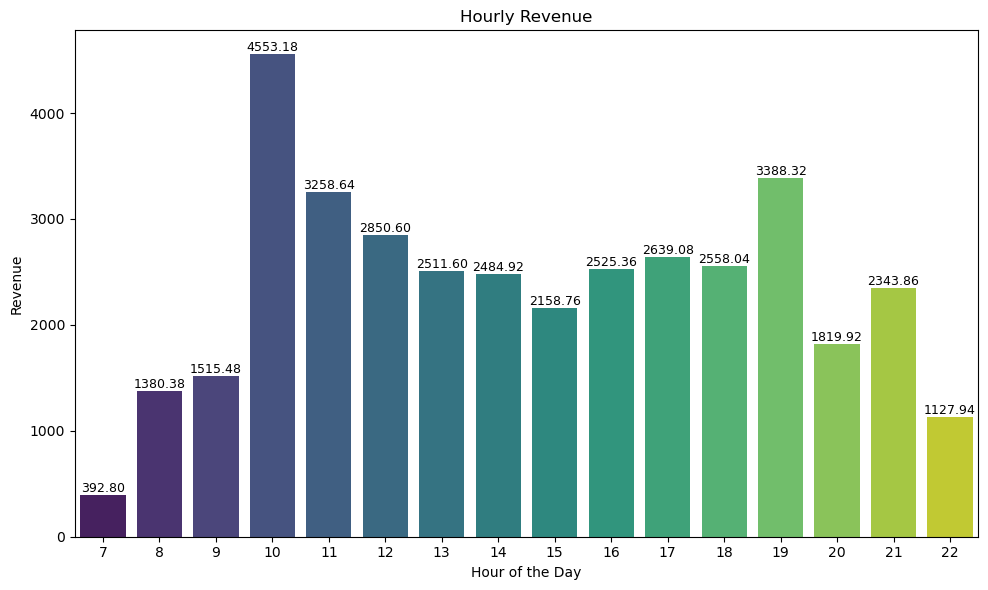

In [62]:
#Revenue Generated by Hours

hourly_revenue = hourly_revenue.sort_values('hour')

plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='revenue', data=hourly_revenue, palette='viridis')


for i, row in hourly_revenue.iterrows():
    plt.text(x=i, y=row['revenue'] + 0.01, s=f"{row['revenue']:.2f}", ha='center', va='bottom', fontsize=9)

plt.xlabel('Hour of the Day')
plt.ylabel('Revenue')
plt.title('Hourly Revenue')
plt.tight_layout()
plt.show()

The most revenue generating hour is 10 followed by 19 and 11. The least revenue generating hours are 7 followed by 22.

2) Daily Revenue

In [46]:
daily_revenue = (coffee_data.groupby('transaction_date')['transaction_amount'].sum().reset_index().rename(columns={'transaction_amount': 'revenue'}))
daily_revenue

,transaction_date,revenue
0,2024-03-01,396.30
1,2024-03-02,228.10
2,2024-03-03,349.10
3,2024-03-04,135.20
4,2024-03-05,338.50
...,...,...
145,2024-07-27,372.76
146,2024-07-28,78.86
147,2024-07-29,321.82
148,2024-07-30,650.48


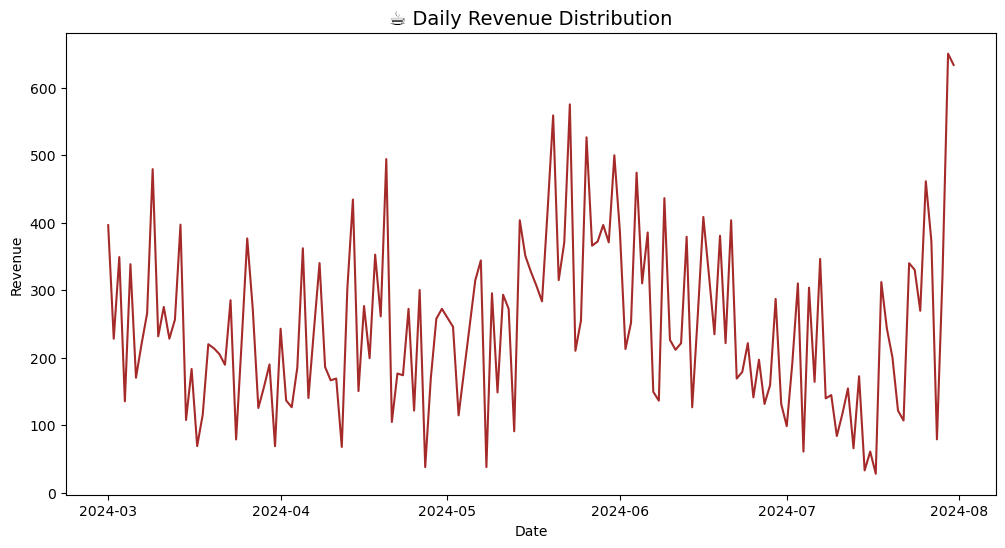

In [47]:
#Daily Revenue Distribution
daily_revenue = coffee_data.groupby('transaction_date')['transaction_amount'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='transaction_date', y='transaction_amount', data=daily_revenue, color='brown')
plt.title(' Daily Revenue Distribution', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

Revenue increased by the end of July.

3) Weekday Revenue

In [48]:
weekday_revenue = (coffee_data.groupby('day_name')['transaction_amount'].sum().reset_index().rename(columns={'transaction_amount': 'revenue'}))
weekday_revenue

,day_name,revenue
0,Friday,5386.32
1,Monday,4969.68
2,Saturday,5216.26
3,Sunday,5050.20
4,Thursday,5466.74
5,Tuesday,6092.48
6,Wednesday,5327.20


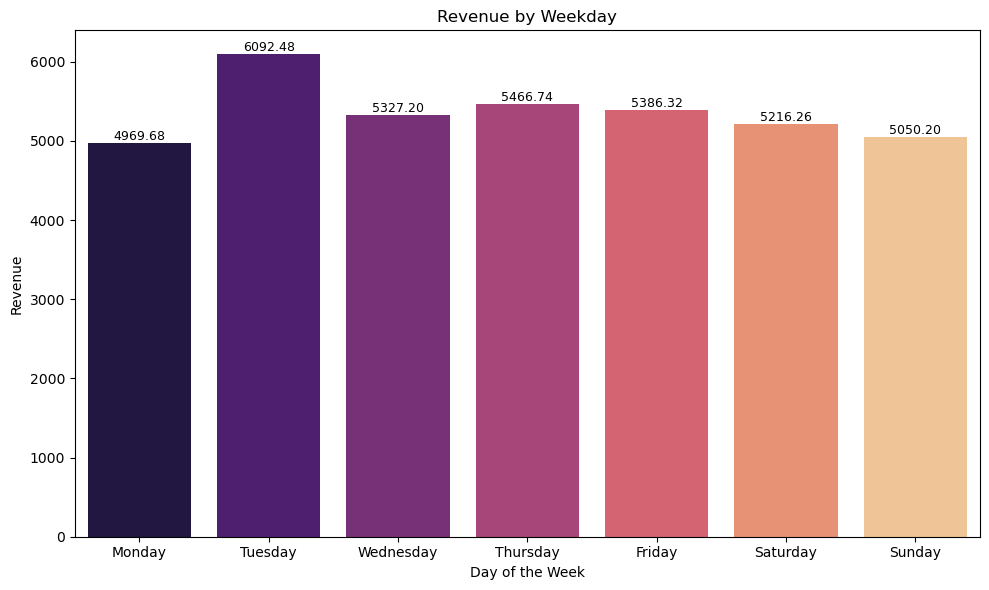

In [64]:
#Weekday Revenue Distribution

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_revenue['day_name'] = pd.Categorical(weekday_revenue['day_name'], categories=weekday_order, ordered=True)
weekday_revenue = weekday_revenue.sort_values('day_name')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='day_name', y='revenue', data=weekday_revenue, palette='magma')


for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width()/2,  
        y=height + 0.01,                
        s=f"{height:.2f}",
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.xlabel('Day of the Week')
plt.ylabel('Revenue')
plt.title('Revenue by Weekday')
plt.tight_layout()
plt.show()

The weekday in which the most revenue generated is Tuesday.

4) Monthly Revenue

In [50]:
monthly_revenue = (coffee_data.groupby('month_name')['transaction_amount'].sum().reset_index().rename(columns={'transaction_amount': 'revenue'}))
monthly_revenue

,month_name,revenue
0,April,6720.56
1,July,6915.94
2,June,7758.76
3,March,7050.20
4,May,9063.42


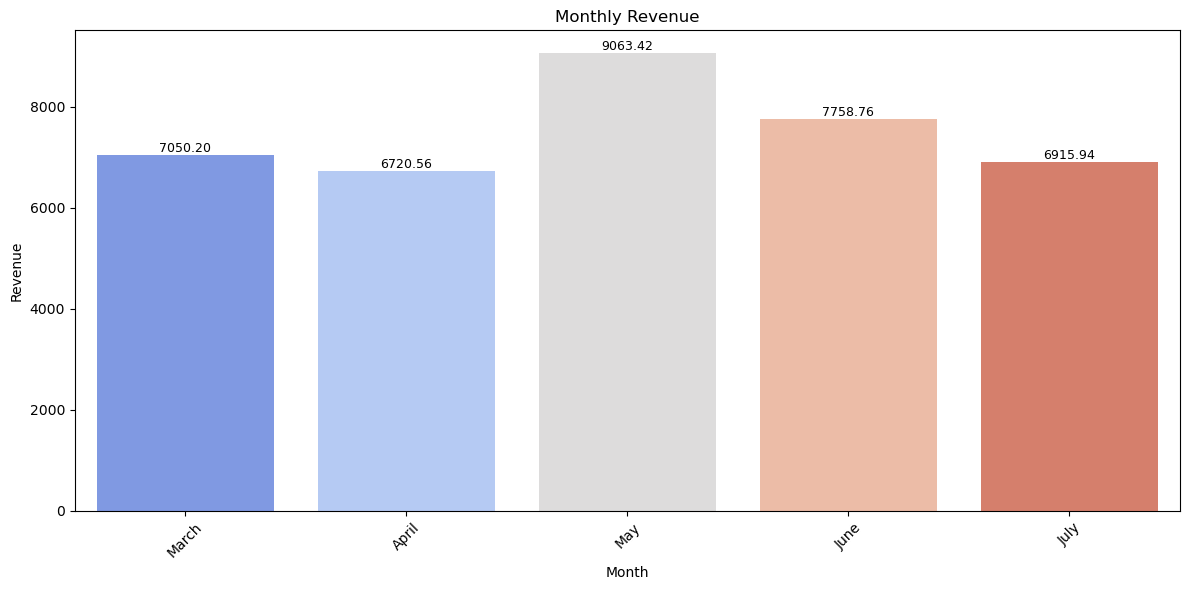

In [65]:
#Monthly Revenue Distribution

month_order = ['March', 'April', 'May', 'June','July']

monthly_revenue['month_name'] = pd.Categorical(monthly_revenue['month_name'], categories=month_order, ordered=True)
monthly_revenue = monthly_revenue.sort_values('month_name')


plt.figure(figsize=(12, 6))
ax = sns.barplot(x='month_name', y='revenue', data=monthly_revenue, palette='coolwarm')


for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width()/2,  
        y=height + 0.01,                
        s=f"{height:.2f}",              
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()



The month in which the most revenue generated is May.

5) Quarterly Revenue

In [52]:
quarterly_revenue = (coffee_data.groupby('quarter')['transaction_amount'].sum().reset_index().rename(columns={'transaction_amount': 'revenue'}))
quarterly_revenue

,quarter,revenue
0,1,7050.20
1,2,23542.74
2,3,6915.94


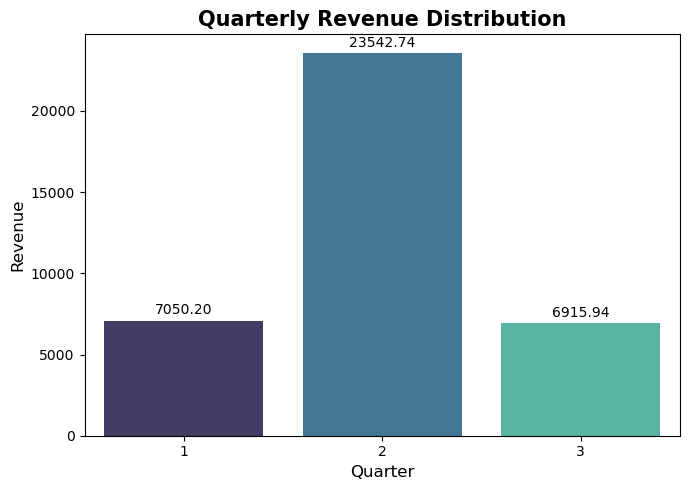

In [53]:
#Quarterly Revenue Distribution

quarterly_revenue = (coffee_data.groupby('quarter')['transaction_amount']
                     .sum()
                     .reset_index()
                     .rename(columns={'transaction_amount': 'revenue'}))


quarterly_revenue = quarterly_revenue.sort_values('quarter')


plt.figure(figsize=(7, 5))
ax = sns.barplot(x='quarter', y='revenue', data=quarterly_revenue, palette='mako')


for i, v in enumerate(quarterly_revenue['revenue']):
    ax.text(i, v + 0.01*quarterly_revenue['revenue'].max(), f'{v:.2f}', 
            ha='center', va='bottom', fontsize=10, fontweight='normal')

plt.title('Quarterly Revenue Distribution', fontsize=15, fontweight='bold')
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.tight_layout()
plt.show()

The quarter in which the most revenue generated is 2nd quarter.

6) Yearly Revenue

In [54]:
yearly_revenue = (coffee_data.groupby('year')['transaction_amount'].sum().reset_index().rename(columns={'transaction_amount': 'revenue'}))
yearly_revenue

,year,revenue
0,2024,37508.88


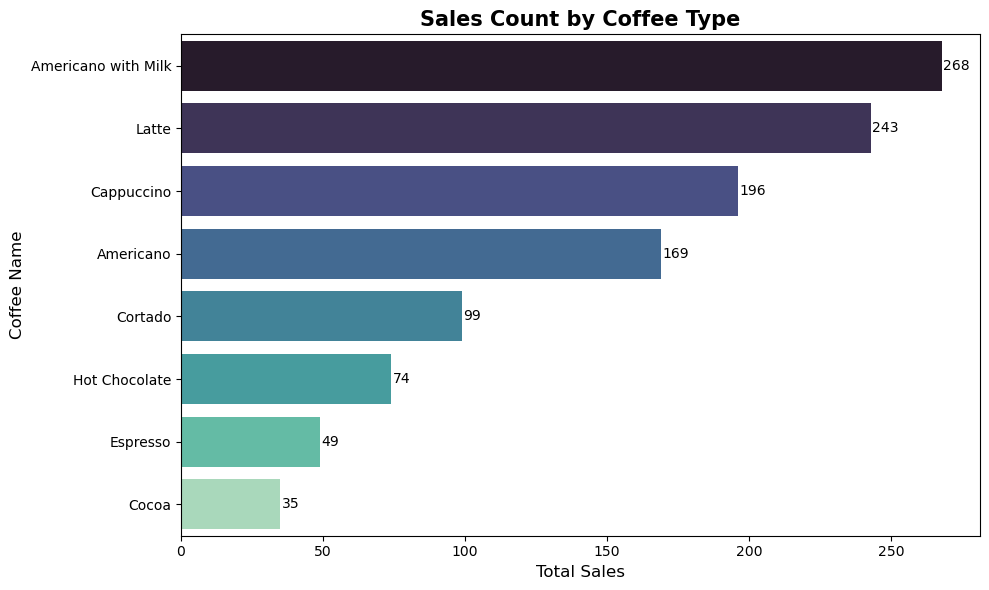

In [55]:
#Number of Sales by Coffee Type

coffee_sales = coffee_data['coffee_name'].value_counts().reset_index()
coffee_sales.columns = ['coffee_name', 'total_sales']


plt.figure(figsize=(10,6))
ax = sns.barplot(y='coffee_name', x='total_sales', data=coffee_sales, palette='mako')


for i, v in enumerate(coffee_sales['total_sales']):
    ax.text(v + 0.5, i, f'{v}', va='center', fontsize=10, fontweight='normal')  # slightly right of the bar


plt.title('Sales Count by Coffee Type', fontsize=15, fontweight='bold')
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Coffee Name', fontsize=12)
plt.tight_layout()
plt.show()

The best-selling coffee type is Americano with Milk followed by Latte.

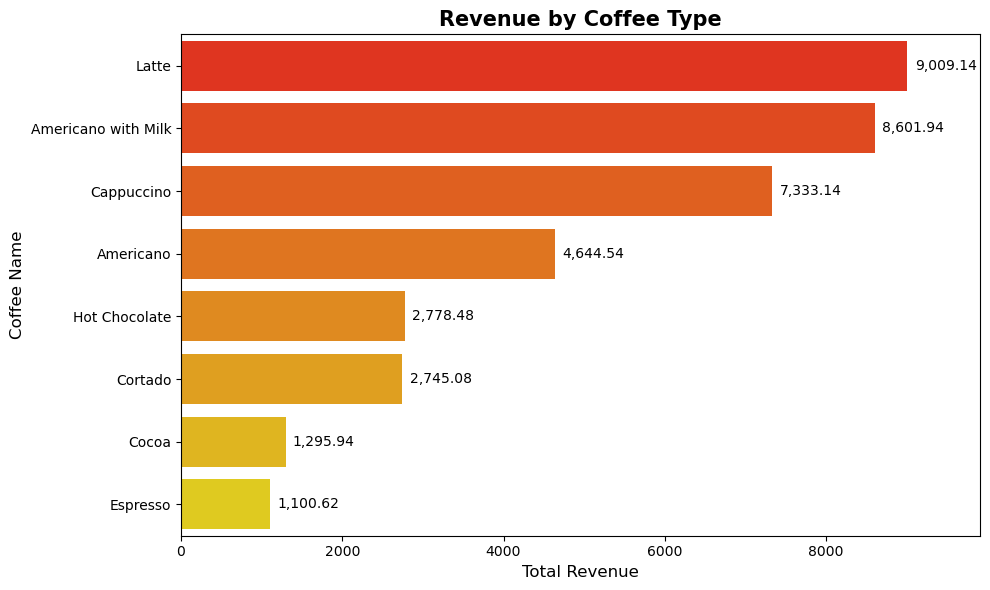

In [56]:
#Total Revenue by Coffee Type

coffee_revenue = coffee_data.groupby('coffee_name')['transaction_amount'] \
                           .sum() \
                           .sort_values(ascending=False) \
                           .reset_index()


plt.figure(figsize=(10,6))
ax = sns.barplot(y='coffee_name', x='transaction_amount', data=coffee_revenue, palette='autumn')


max_val = coffee_revenue['transaction_amount'].max()
ax.set_xlim(0, max_val * 1.1)  


for i, v in enumerate(coffee_revenue['transaction_amount']):
    ax.text(v + 0.01*max_val, i, f'{v:,.2f}', 
            va='center', fontsize=10, fontweight='normal')


plt.title('Revenue by Coffee Type', fontsize=15, fontweight='bold')
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Coffee Name', fontsize=12)
plt.tight_layout()
plt.show()

Latte is the most revenue generating coffee type followed by Americano with Milk.

In [57]:
#Average Money that Customers Spent per Coffee Type
average_money_per_coffee = coffee_data.groupby('coffee_name')['transaction_amount'].mean().sort_values(ascending=False)
print("Average Money Spent per Coffee Type:\n", average_money_per_coffee)

Average Money Spent per Coffee Type:
 coffee_name
Hot Chocolate          37.547027
Cappuccino             37.413980
Latte                  37.074650
Cocoa                  37.026857
Americano with Milk    32.096791
Cortado                27.728081
Americano              27.482485
Espresso               22.461633
Name: transaction_amount, dtype: float64


Customers spend the most on Hot Chocolate, Cappuccino, Latte, and Cocoa, with an average spending of around 37 dollars per transaction.
The lowest average spending is on Espresso (22 dollars), which indicates that premium and milk-based drinks generate higher revenue per order compared to basic coffee types.

**Sales Trends Over Time by Coffee Type**

1) Hourly sales by coffee type

In [19]:
hourly_sales_coffee = coffee_data.pivot_table(
    index='hour',
    columns='coffee_name',
    values='transaction_date',
    aggfunc='count',
    fill_value=0
).reset_index()

hourly_sales_coffee


coffee_name,hour,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,7,5,4,1,0,1,0,0,2
1,8,10,7,8,1,6,0,0,12
2,9,8,16,6,1,5,3,0,11
3,10,20,31,10,4,8,2,7,51
4,11,21,25,16,1,13,6,8,13
5,12,14,26,15,3,7,6,3,13
6,13,18,18,10,2,12,3,4,11
7,14,15,18,13,4,6,5,2,13
8,15,14,15,8,0,3,4,6,15
9,16,10,18,12,3,12,5,4,13


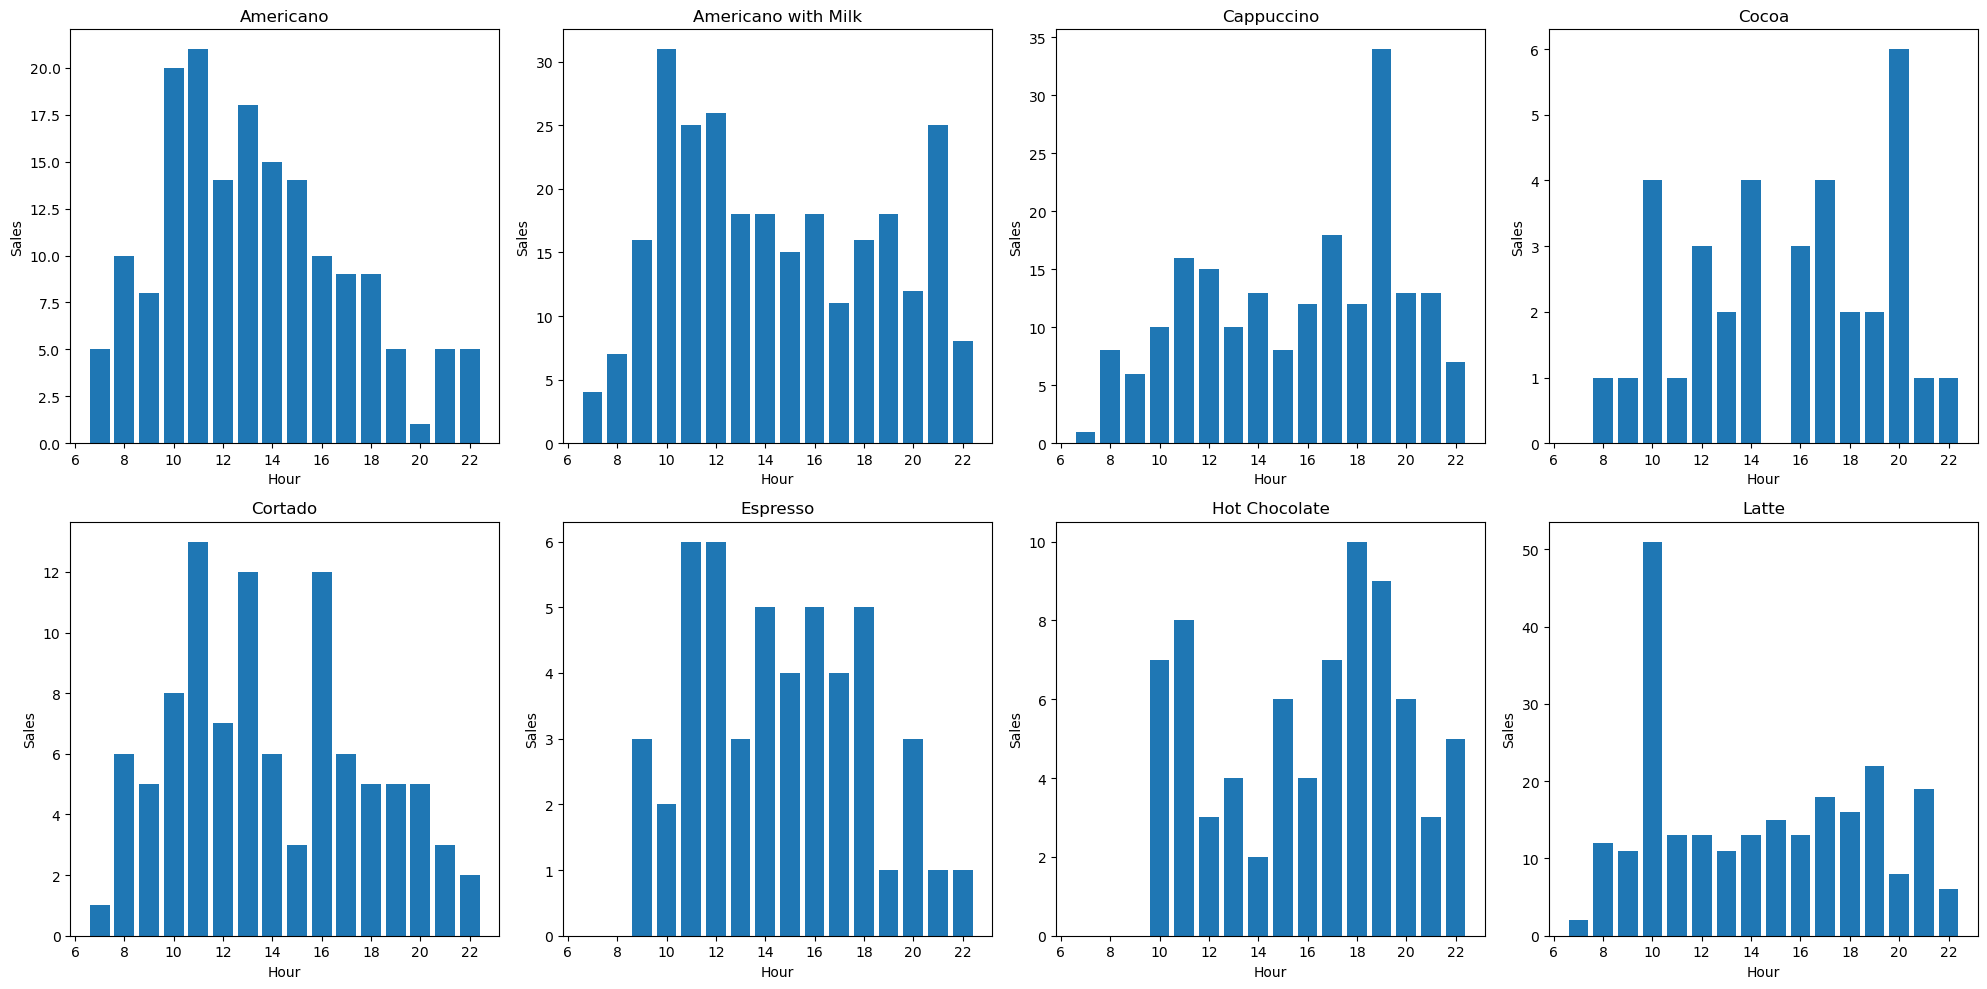

In [22]:
#Hourly Sales by Coffee Type
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

axs = axs.flatten()

for i, column in enumerate(hourly_sales_coffee.columns[1:]):
    
 axs[i].bar(hourly_sales_coffee['hour'],
 hourly_sales_coffee[column])
 axs[i].set_title(f'{column}')
 axs[i].set_xlabel('Hour')
 axs[i].set_ylabel('Sales')
plt.tight_layout()

plt.show()

Sales are very low in the early morning (7–8 AM) and increase steadily after 9 AM.
The highest activity is observed between 10 AM and 7 PM, which is the main peak period.

Latte shows the strongest demand, especially at 10 AM (51 sales) and remains high throughout the day.

Cappuccino peaks in the evening around 7 PM (34 sales), indicating higher preference for milk-based drinks later in the day.

Americano with Milk performs consistently well during late morning and evening hours.

Espresso remains the least preferred drink across all hours.

This indicates that customers prefer milk-based and premium drinks during working hours and evening time rather than early mornings.

In [59]:
# Product Performance by Time
print("\n PRODUCT PERFORMANCE BY TIME PERIOD:")
morning = coffee_data[coffee_data['hour'].between(6, 11)]
afternoon = coffee_data[coffee_data['hour'].between(12, 17)]
evening = coffee_data[coffee_data['hour'].between(18, 23)]

print("\n  Morning (6AM-11AM) Top Product:", morning['coffee_name'].mode()[0])
print("  Afternoon (12PM-5PM) Top Product:", afternoon['coffee_name'].mode()[0])
print("  Evening (6PM-11PM) Top Product:", evening['coffee_name'].mode()[0])


 PRODUCT PERFORMANCE BY TIME PERIOD:

  Morning (6AM-11AM) Top Product: Latte
  Afternoon (12PM-5PM) Top Product: Americano with Milk
  Evening (6PM-11PM) Top Product: Americano with Milk


In [60]:
#Minimum and Maximum Hourly Sales of Coffee Types 
hourly_sales_coffee.iloc[:,1:].describe().T.loc[:,['min','max']]

,min,max
coffee_name,,
Americano,1.0,21.0
Americano with Milk,4.0,31.0
Cappuccino,1.0,34.0
Cocoa,1.0,6.0
Cortado,1.0,13.0
Espresso,1.0,6.0
Hot Chocolate,2.0,10.0
Latte,2.0,51.0


Latte has the highest maximum sales (51), showing it is the most popular drink.
Cappuccino (34) and Americano with Milk (31) also perform well.
Espresso, Cocoa, and Hot Chocolate have much lower maximum sales, meaning they are less preferred compared to other coffee types.

In [70]:
# Which coffee type sold out most in each hour?

coffee_columns = hourly_sales_coffee.columns.drop('hour')
hourly_sales_coffee[coffee_columns] = hourly_sales_coffee[coffee_columns].apply(pd.to_numeric, errors='coerce')


hourly_sales_coffee['top_coffee'] = hourly_sales_coffee[coffee_columns].idxmax(axis=1)
hourly_sales_coffee['top_sales'] = hourly_sales_coffee[coffee_columns].max(axis=1)


print(hourly_sales_coffee[['hour', 'top_coffee', 'top_sales']]

coffee_name  hour           top_coffee  top_sales
0               7            Americano        5.0
1               8                Latte       12.0
2               9  Americano with Milk       16.0
3              10                Latte       51.0
4              11  Americano with Milk       25.0
5              12  Americano with Milk       26.0
6              13            Americano       18.0
7              14  Americano with Milk       18.0
8              15  Americano with Milk       15.0
9              16  Americano with Milk       18.0
10             17           Cappuccino       18.0
11             18  Americano with Milk       16.0
12             19           Cappuccino       34.0
13             20           Cappuccino       13.0
14             21  Americano with Milk       25.0
15             22  Americano with Milk        8.0


Morning (7–10 AM): Customers mostly prefer Latte and Americano with Milk.

Afternoon (11 AM – 4 PM): Americano with Milk dominates sales almost every hour.

Evening (5 PM – 10 PM): Customers shift towards Cappuccino, especially at 7–8 PM, where it records the highest evening sales.

Overall, Americano with Milk is the most consistent top-selling coffee throughout the day.

2) Daily sales by coffee type

In [24]:
daily_sales_coffee = (
    coffee_data.groupby(['transaction_date', 'coffee_name'])
    .size()  
    .reset_index(name='count')  
    .pivot(index='transaction_date', columns='coffee_name', values='count')
    .fillna(0)  
    .reset_index()
)

daily_sales_coffee

coffee_name,transaction_date,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,2024-03-01,1.0,4.0,0.0,1.0,0.0,0.0,3.0,2.0
1,2024-03-02,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2024-03-03,1.0,2.0,0.0,1.0,2.0,0.0,2.0,2.0
3,2024-03-04,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
4,2024-03-05,0.0,0.0,0.0,1.0,1.0,0.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...
145,2024-07-27,0.0,5.0,4.0,0.0,0.0,2.0,0.0,2.0
146,2024-07-28,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
147,2024-07-29,3.0,2.0,2.0,1.0,0.0,0.0,2.0,1.0
148,2024-07-30,2.0,12.0,2.0,0.0,3.0,2.0,0.0,3.0


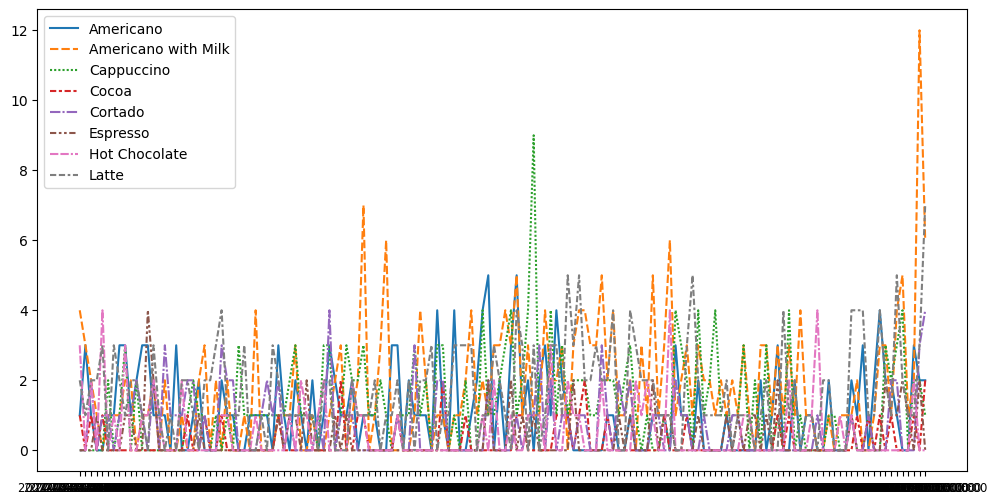

In [25]:
#Daily Sales by Coffee Type
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_sales_coffee)
plt.legend(loc='upper left')
plt.xticks(range(len(daily_sales_coffee['transaction_date'])),daily_sales_coffee['transaction_date'],size='small')
plt.show()

In [76]:
#Minimum and Maximum Datewise/Daily Sales of Coffee Types
daily_sales_coffee.iloc[:,1:].describe().T.loc[:,['min','max']]

,min,max
coffee_name,,
Americano,0.0,5.0
Americano with Milk,0.0,12.0
Cappuccino,0.0,9.0
Cocoa,0.0,2.0
Cortado,0.0,4.0
Espresso,0.0,4.0
Hot Chocolate,0.0,4.0
Latte,0.0,7.0


On some days, all coffee types record zero sales, showing that not every product sells daily.
The highest daily sales are seen for Americano with Milk (12), Cappuccino (9) and Latte (7), making them the strongest daily performers, while Cocoa, Espresso, Cortado, and Hot Chocolate have very low maximum daily sales, indicating low demand.

3)Weekday sales by coffee type

In [26]:
weekday_sales_coffee =coffee_data.groupby(['coffee_name','day_name']).count()['transaction_date'].reset_index().rename(columns={'transaction_date':'count'}).pivot(index='day_name',columns='coffee_name',values='count').reset_index()
weekday_sales_coffee

coffee_name,day_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,Friday,25,34,23,7,16,8,13,37
1,Monday,37,32,31,3,11,4,5,28
2,Saturday,17,48,31,6,8,4,7,33
3,Sunday,17,34,28,3,14,8,14,33
4,Thursday,24,31,27,1,14,9,12,46
5,Tuesday,26,54,27,9,18,3,15,33
6,Wednesday,23,35,29,6,18,13,8,33


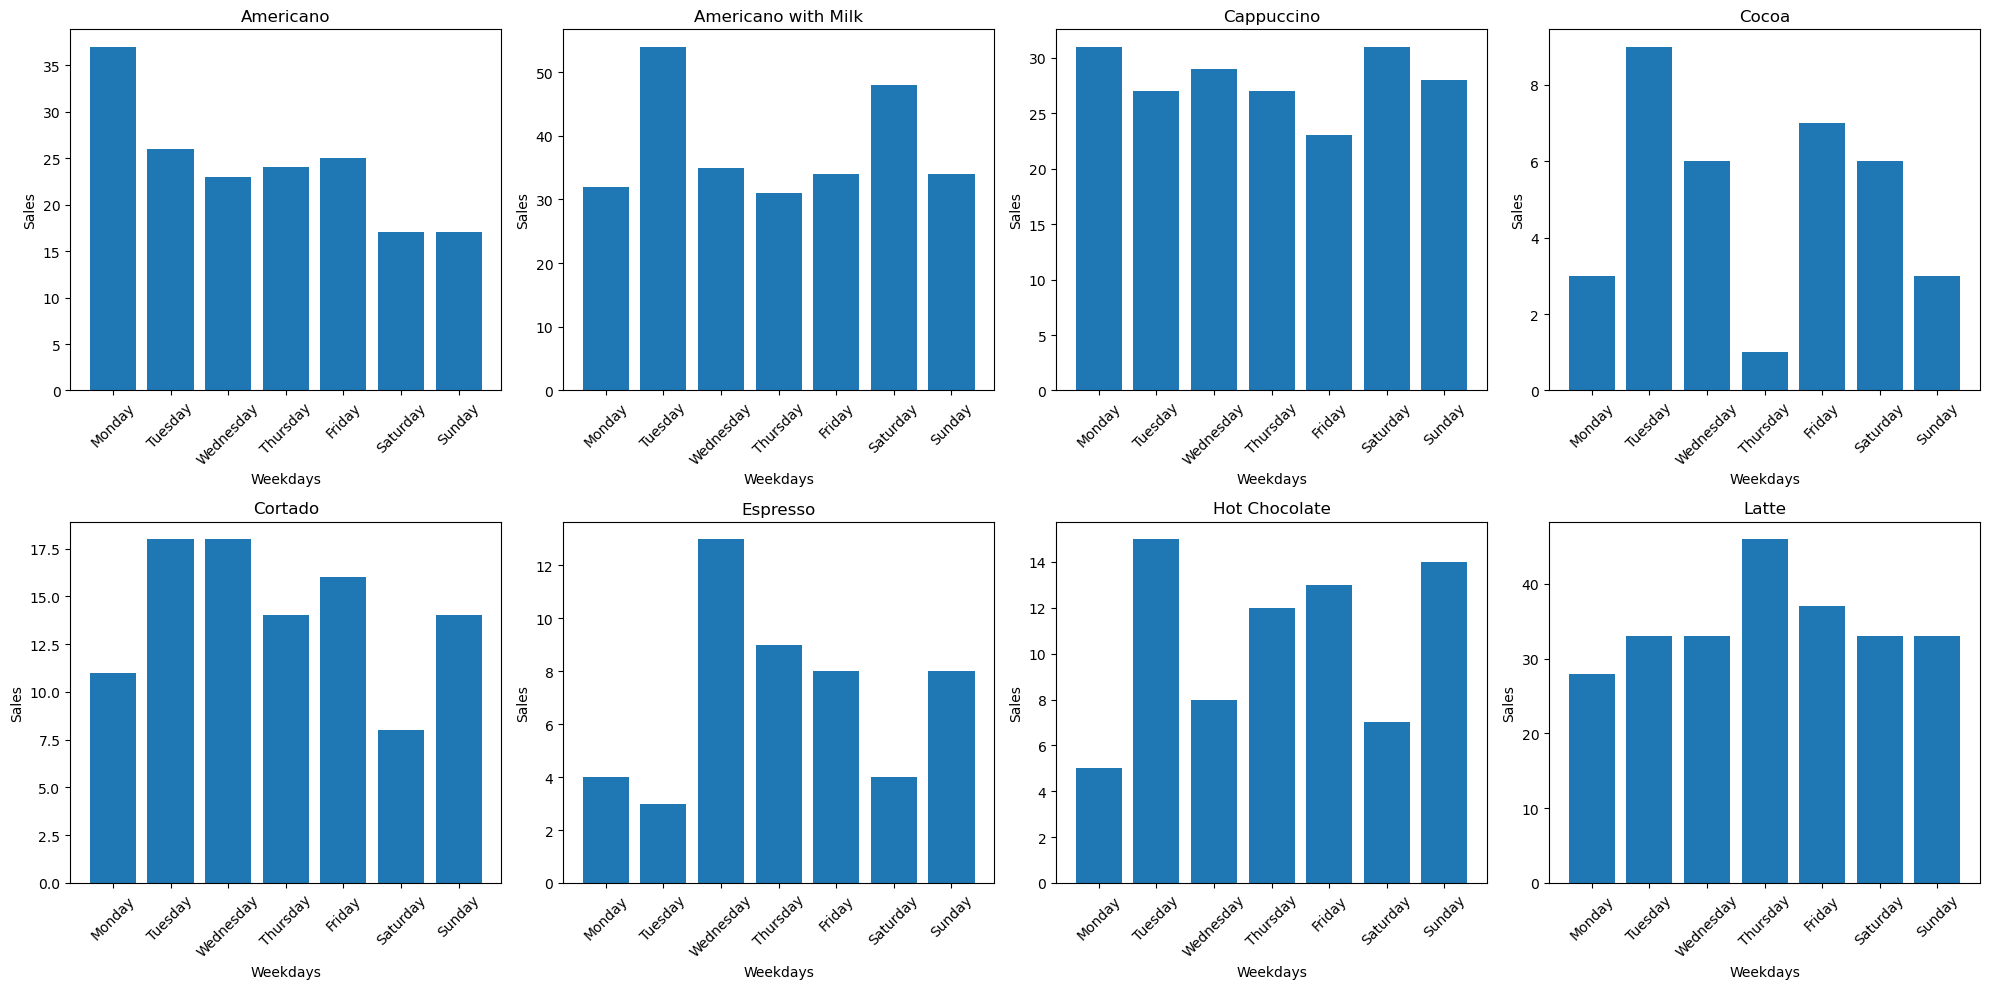

In [29]:
#Weekday Sales by Coffee Type

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


weekday_sales_coffee = weekday_sales_coffee.set_index('day_name').loc[weekday_order].reset_index()

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.flatten()

for i, column in enumerate(weekday_sales_coffee.columns[1:]):
    axs[i].bar(weekday_sales_coffee['day_name'], weekday_sales_coffee[column])
    axs[i].set_title(f'{column}')
    axs[i].set_xlabel('Weekdays')
    axs[i].set_ylabel('Sales')
    
    
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



Latte is the top-selling coffee on most weekdays, especially on Thursday (46 sales).

Americano with Milk performs very well on Tuesday (54 sales) and Saturday (48 sales).

Cappuccino has consistent sales across all days, usually between 27–31.

Espresso, Cocoa, and Cortado have the lowest sales on all days, showing lower demand.

Overall, Latte and Americano with Milk are the most popular coffee types, while simpler or smaller drinks sell less consistently.

In [82]:
#Minimum and Maximum Weekdays Sales of Coffee Types
weekday_sales_coffee.iloc[:,1:].describe().T.loc[:,['min','max']]

,min,max
coffee_name,,
Americano,17.0,37.0
Americano with Milk,31.0,54.0
Cappuccino,23.0,31.0
Cocoa,1.0,9.0
Cortado,8.0,18.0
Espresso,3.0,13.0
Hot Chocolate,5.0,15.0
Latte,28.0,46.0


In [83]:
# Which coffee type sold out most in each weekday?

coffee_columns = weekday_sales_coffee.columns.drop('day_name')
weekday_sales_coffee[coffee_columns] = weekday_sales_coffee[coffee_columns].apply(pd.to_numeric, errors='coerce')


weekday_sales_coffee['top_coffee'] = weekday_sales_coffee[coffee_columns].idxmax(axis=1)
weekday_sales_coffee['top_sales'] = weekday_sales_coffee[coffee_columns].max(axis=1)


print(weekday_sales_coffee[['day_name', 'top_coffee', 'top_sales']])

coffee_name   day_name           top_coffee  top_sales
0               Friday                Latte         37
1               Monday            Americano         37
2             Saturday  Americano with Milk         48
3               Sunday  Americano with Milk         34
4             Thursday                Latte         46
5              Tuesday  Americano with Milk         54
6            Wednesday  Americano with Milk         35


Americano with Milk has the highest weekday sales, ranging from 31 to 54, making it the most consistent top performer.

Latte also sells very well, with sales between 28 and 46.

Cappuccino has steady sales (23–31) across the week.

Espresso, Cocoa, Cortado, and Hot Chocolate sell much less, showing lower demand.

Latte is the top-selling coffee on Friday and Thursday.

Americano with Milk dominates on Tuesday, Wednesday, Saturday, and Sunday.

Americano is the top seller only on Monday.

Overall, Americano with Milk and Latte are the most popular coffees across the weekdays.


4) Monthly sales by coffee type

In [30]:
monthly_sales_coffee =coffee_data.groupby(['coffee_name','month_name']).count()['transaction_date'].reset_index().rename(columns={'transaction_date':'count'}).pivot(index='month_name',columns='coffee_name',values='count').reset_index()
monthly_sales_coffee

coffee_name,month_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,April,35,42,43,6,19,7,13,31
1,July,36,65,32,9,14,14,11,56
2,June,14,69,46,5,19,10,14,50
3,March,36,34,20,6,30,10,22,48
4,May,48,58,55,9,17,8,14,58


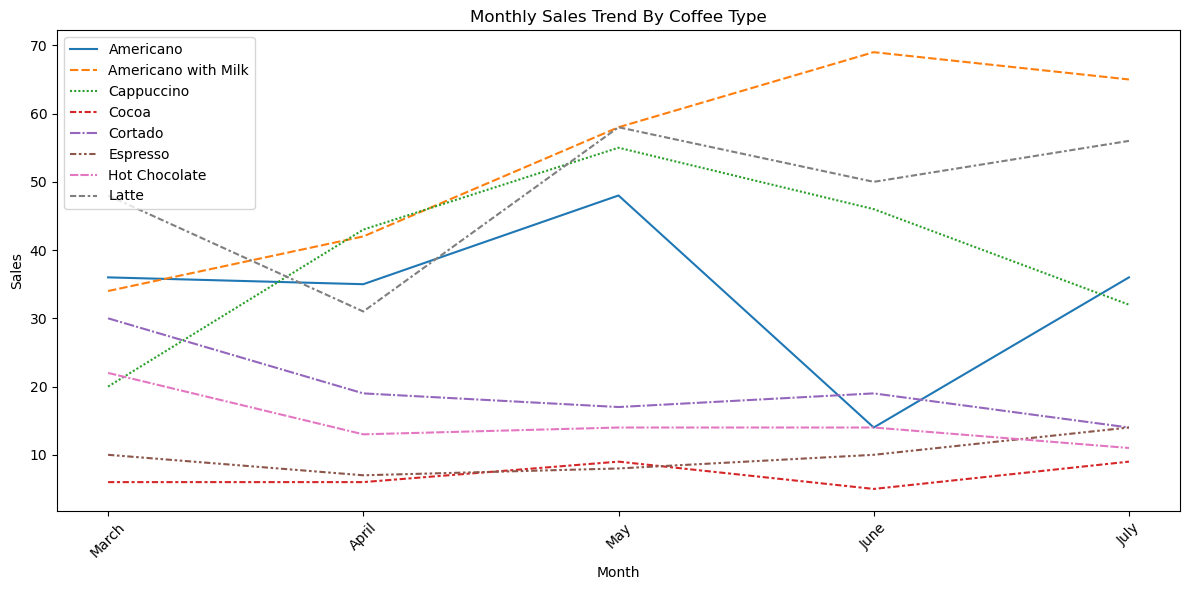

In [33]:
#Monthly Sales by Coffee Type
month_order = ['March', 'April', 'May', 'June', 'July']
monthly_sales_coffee = (monthly_sales_coffee.set_index('month_name').loc[month_order].reset_index())
plt.figure(figsize=(12,6))

sns.lineplot(data=monthly_sales_coffee)

plt.legend(loc='upper left')
plt.xticks(
    range(len(monthly_sales_coffee['month_name'])),
    monthly_sales_coffee['month_name'],
    fontsize=10,
    rotation=45
)

plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Monthly Sales Trend By Coffee Type")
plt.tight_layout()
plt.show()

Latte consistently sells well across all months, with the highest in May (58) and July (56).

Americano with Milk is the top seller in June (69) and July (65), showing strong popularity.

Cappuccino performs steadily, peaking in May (55).

Americano has moderate sales, while Espresso, Cocoa, Cortado, and Hot Chocolate sell the least.

Overall, Latte and Americano with Milk are the strongest performers every month, while simpler or smaller drinks have lower sales.

In [78]:
#Minimum and Maximum Monthly Sales of Coffee Types
monthly_sales_coffee.iloc[:,1:].describe().T.loc[:,['min','max']]

,min,max
coffee_name,,
Americano,14.0,48.0
Americano with Milk,34.0,69.0
Cappuccino,20.0,55.0
Cocoa,5.0,9.0
Cortado,14.0,30.0
Espresso,7.0,14.0
Hot Chocolate,11.0,22.0
Latte,31.0,58.0


Americano with Milk has the highest monthly sales, ranging from 34 to 69, making it the most popular coffee each month.

Latte also sells very well, between 31 and 58.

Cappuccino has steady monthly sales (20–55).

Espresso, Cocoa, Cortado, and Hot Chocolate have lower sales, showing less demand.

Overall, Americano with Milk and Latte are the top-selling coffees every month.

In [79]:
# Which coffee type sold out most in each month?

monthly_sales_coffee = (
    coffee_data.groupby(['month_name', 'coffee_name'])
    .size()  
    .reset_index(name='count')  
    .pivot(index='month_name', columns='coffee_name', values='count')
    .fillna(0)  
    .reset_index()
)


coffee_columns = monthly_sales_coffee.columns.drop('month_name')
monthly_sales_coffee[coffee_columns] = monthly_sales_coffee[coffee_columns].apply(pd.to_numeric, errors='coerce')


monthly_sales_coffee['top_coffee'] = monthly_sales_coffee[coffee_columns].idxmax(axis=1)
monthly_sales_coffee['top_sales'] = monthly_sales_coffee[coffee_columns].max(axis=1)


print(monthly_sales_coffee[['month_name', 'top_coffee', 'top_sales']]

coffee_name month_name           top_coffee  top_sales
0                April           Cappuccino         43
1                 July  Americano with Milk         65
2                 June  Americano with Milk         69
3                March                Latte         48
4                  May  Americano with Milk         58


Americano with Milk is the top-selling coffee in May, June, and July.

Latte is the top seller in March.

Cappuccino leads in April.

Overall, Americano with Milk dominates most months, while Latte and Cappuccino occasionally take the top spot.

**Revenue Trends Over Time By Coffee Type**

1) Hourly Revenue by coffee type

In [34]:
#Hourly Revenue by coffee type
hourly_revenue_coffee = (
    coffee_data.groupby(['hour', 'coffee_name'])['transaction_amount']
    .sum()
    .reset_index()
    .pivot(index='hour', columns='coffee_name', values='transaction_amount')
    .fillna(0)
    .reset_index()
)

hourly_revenue_coffee

coffee_name,hour,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,7,137.86,123.66,32.82,0.00,27.92,0.00,0.00,70.54
1,8,254.70,215.04,296.86,32.82,157.72,0.00,0.00,423.24
2,9,199.94,482.20,201.82,39.00,129.80,60.24,0.00,402.48
3,10,558.52,992.16,378.82,146.96,223.48,48.02,257.18,1948.04
4,11,560.08,784.68,595.32,37.72,366.02,124.40,296.20,494.22
5,12,395.88,835.14,563.84,114.14,204.50,138.16,115.12,483.82
6,13,510.40,586.84,387.64,71.52,337.00,71.02,154.80,392.38
7,14,423.90,590.96,496.24,141.08,170.46,107.26,71.52,483.50
8,15,400.02,488.60,300.12,0.00,86.82,94.04,232.84,556.32
9,16,282.14,581.16,458.18,116.42,336.02,118.04,151.86,481.54


Revenue is low in the early morning (7–8 AM) and increases significantly after 9 AM, peaking around 10–11 AM.

Latte generates the highest revenue at 10 AM (1948 dollars), making it the most profitable coffee during peak hours.

Americano with Milk also brings high revenue in late morning and afternoon hours, especially at 10–12 PM.

Cappuccino has steady revenue throughout the day, peaking at 7 PM (674 dollars).

Espresso, Cocoa, Cortado, and Hot Chocolate contribute less to total revenue.

Overall, Latte and Americano with Milk drive most of the hourly revenue, while smaller or simpler drinks have a minor impact.

In [35]:
# Which coffee type generated more revenue in each hour?
coffee_columns = hourly_revenue_coffee.columns.drop('hour')
hourly_revenue_coffee['top_coffee'] = hourly_revenue_coffee[coffee_columns].idxmax(axis=1)
hourly_revenue_coffee['top_revenue'] = hourly_revenue_coffee[coffee_columns].max(axis=1)

print(hourly_revenue_coffee[['hour', 'top_coffee', 'top_revenue']])

coffee_name  hour           top_coffee  top_revenue
0               7            Americano       137.86
1               8                Latte       423.24
2               9  Americano with Milk       482.20
3              10                Latte      1948.04
4              11  Americano with Milk       784.68
5              12  Americano with Milk       835.14
6              13  Americano with Milk       586.84
7              14  Americano with Milk       590.96
8              15                Latte       556.32
9              16  Americano with Milk       581.16
10             17           Cappuccino       674.00
11             18                Latte       603.82
12             19           Cappuccino      1264.18
13             20           Cappuccino       486.74
14             21  Americano with Milk       817.96
15             22           Cappuccino       255.52


Latte generates the most revenue in the morning peak hours (8 AM, 10 AM, 3 PM, 6 PM).

Americano with Milk dominates revenue in late morning and afternoon (9 AM, 11 AM–4 PM, 9 PM).

Cappuccino takes the top spot in the evening (5 PM, 7 PM, 8 PM, 10 PM).

Americano leads only at 7 AM, early in the day.

Overall, Latte and Americano with Milk are the main revenue drivers, while Cappuccino contributes strongly in the evening.

In [88]:
#Minimum and Maximum Hourly Revenue generation by coffee types
hourly_revenue_coffee.iloc[:,1:].describe().T.loc[:,['min','max']]

,min,max
coffee_name,,
Americano,27.92,560.08
Americano with Milk,123.66,992.16
Cappuccino,32.82,1264.18
Cocoa,0.00,222.70
Cortado,27.92,366.02
Espresso,0.00,138.16
Hot Chocolate,0.00,383.08
Latte,70.54,1948.04
top_revenue,137.86,1948.04


Latte generates the highest hourly revenue, ranging from 70 to 1948 dollars, making it the most profitable coffee.

Cappuccino and Americano with Milk also bring high revenue, with maximums of 1264 and 992 dollars respectively.

Americano has moderate revenue (28–560 dollars), while Espresso, Cocoa, Cortado, and Hot Chocolate earn much less.

Overall, Latte, Cappuccino, and Americano with Milk are the main revenue drivers, while other coffees contribute less.

2) Daily revenue by coffee type

In [85]:
#Daily Revenue by coffee type
daily_revenue_coffee = (
    coffee_data.groupby(['transaction_date', 'coffee_name'])['transaction_amount']
    .sum()
    .reset_index()
    .pivot(index='transaction_date', columns='coffee_name', values='transaction_amount')
    .fillna(0)
    .reset_index()
)

coffee_columns = daily_revenue_coffee.columns.drop('transaction_date')
daily_revenue_coffee['top_coffee'] = daily_revenue_coffee[coffee_columns].idxmax(axis=1)
daily_revenue_coffee['top_revenue'] = daily_revenue_coffee[coffee_columns].max(axis=1)

print(daily_revenue_coffee[['transaction_date', 'top_coffee', 'top_revenue']])

coffee_name transaction_date           top_coffee  top_revenue
0                 2024-03-01  Americano with Milk       135.20
1                 2024-03-02  Americano with Milk       101.40
2                 2024-03-03                Latte        78.70
3                 2024-03-04                Latte        77.40
4                 2024-03-05        Hot Chocolate       154.80
..                       ...                  ...          ...
145               2024-07-27  Americano with Milk       139.60
146               2024-07-28                Latte        32.82
147               2024-07-29            Americano        69.06
148               2024-07-30  Americano with Milk       335.04
149               2024-07-31                Latte       229.74

[150 rows x 3 columns]


In [89]:
#Minimum and Maximum Daily Revenue generation by coffee types
daily_revenue_coffee.iloc[:,1:].describe().T.loc[:,['min','max']]

,min,max
coffee_name,,
Americano,0.00,140.68
Americano with Milk,0.00,335.04
Cappuccino,0.00,339.48
Cocoa,0.00,77.40
Cortado,0.00,117.80
Espresso,0.00,97.00
Hot Chocolate,0.00,154.80
Latte,0.00,229.74
top_revenue,27.92,339.48


Cappuccino and Americano with Milk generate the highest daily revenue, with maximums of 339.48 and 335.04 dollars respectively.

Latte also earns well, up to 229.74 dollars per day.

Americano, Espresso, Cocoa, Cortado, and Hot Chocolate have lower daily revenue, often close to zero on some days.

Overall, Americano with Milk, Cappuccino, and Latte are the main contributors to daily revenue.

3) Weekday revenue by coffee type

In [86]:
#Weekdays Revenue by coffee type
weekday_revenue_coffee = (
    coffee_data.groupby(['day_name', 'coffee_name'])['transaction_amount']
    .sum()
    .reset_index()
    .pivot(index='day_name', columns='coffee_name', values='transaction_amount')
    .fillna(0)
    .reset_index()
)

#Which coffee type created more revenue in each weekday?
coffee_columns = weekday_revenue_coffee.columns.drop('day_name')
weekday_revenue_coffee['top_coffee'] = weekday_revenue_coffee[coffee_columns].idxmax(axis=1)
weekday_revenue_coffee['top_revenue'] = weekday_revenue_coffee[coffee_columns].max(axis=1)

print(weekday_revenue_coffee[['day_name', 'top_coffee', 'top_revenue']])

coffee_name   day_name           top_coffee  top_revenue
0               Friday                Latte      1366.80
1               Monday           Cappuccino      1165.36
2             Saturday  Americano with Milk      1563.82
3               Sunday                Latte      1236.56
4             Thursday                Latte      1727.20
5              Tuesday  Americano with Milk      1682.74
6            Wednesday                Latte      1203.56


In [90]:
##Minimum and Maximum Weekday Revenue generation by coffee types
weekday_revenue_coffee.iloc[:,1:].describe().T.loc[:,['min','max']]

,min,max
coffee_name,,
Americano,471.90,1013.96
Americano with Milk,1007.62,1682.74
Cappuccino,864.60,1165.36
Cocoa,32.82,339.78
Cortado,228.26,496.80
Espresso,59.26,298.32
Hot Chocolate,179.78,572.00
Latte,1046.98,1727.20
top_revenue,1165.36,1727.20


Latte generates the highest revenue on Friday, Sunday, Thursday, and Wednesday, with a maximum of 1727.20 dollars on Thursday.

Americano with Milk tops revenue on Tuesday and Saturday, reaching up to 1682.74 dollars.

Cappuccino leads only on Monday.

Americano, Espresso, Cocoa, Cortado, and Hot Chocolate earn much less revenue on weekdays.

Overall, Latte and Americano with Milk are the main weekday revenue drivers, while other coffees contribute significantly less.

4) Monthly revenue by coffee type

In [87]:
#Monthly  Revenue generation by coffee types
monthly_revenue_coffee = (
    coffee_data.groupby(['month_name', 'coffee_name'])['transaction_amount']
    .sum()
    .reset_index()
    .pivot(index='month_name', columns='coffee_name', values='transaction_amount')
    .fillna(0)
    .reset_index()
)
#Which coffee type created more revenue in each month?
coffee_columns = monthly_revenue_coffee.columns.drop('month_name')
monthly_revenue_coffee['top_coffee'] = monthly_revenue_coffee[coffee_columns].idxmax(axis=1)
monthly_revenue_coffee['top_revenue'] = monthly_revenue_coffee[coffee_columns].max(axis=1)

print(monthly_revenue_coffee[['month_name', 'top_coffee', 'top_revenue']])

coffee_name month_name           top_coffee  top_revenue
0                April           Cappuccino      1659.44
1                 July  Americano with Milk      1863.80
2                 June  Americano with Milk      2268.12
3                March                Latte      1874.50
4                  May                Latte      2198.00


In [91]:
#Minimum and Maximum Monthly Revenue generation by coffee types
monthly_revenue_coffee.iloc[:,1:].describe().T.loc[:,['min','max']]

,min,max
coffee_name,,
Americano,390.88,1348.80
Americano with Milk,1154.00,2268.12
Cappuccino,780.50,2078.44
Cocoa,189.88,340.76
Cortado,322.28,869.20
Espresso,171.00,273.28
Hot Chocolate,361.02,854.00
Latte,1193.12,2198.00
top_revenue,1659.44,2268.12


Americano with Milk generates the highest revenue in June (2268.12 dollars) and July (1863.80 dollars).

Latte leads in March (1874.50 dollars) and May (2198.00 dollars).

Cappuccino tops revenue only in April (1659.44 dollars).

Americano, Espresso, Cocoa, Cortado, and Hot Chocolate earn much less compared to these top three.

Overall, Americano with Milk and Latte are the main revenue drivers each month, while Cappuccino occasionally leads, and other coffees contribute less.

**Customer Purchase Behaviour Analysis**

In [97]:
coffee_data['card'].value_counts()

CASH_USER              89
ANON-0000-0000-0012    88
ANON-0000-0000-0009    63
ANON-0000-0000-0097    27
ANON-0000-0000-0003    23
                       ..
ANON-0000-0000-0196     1
ANON-0000-0000-0195     1
ANON-0000-0000-0193     1
ANON-0000-0000-0190     1
ANON-0000-0000-0446     1
Name: card, Length: 447, dtype: int64

There are 89 purchases made using cash. These may come from one or multiple customers, but we cannot identify them individually because cash user IDs are not available. Only the card users’ customer IDs are known, so analysis of unique cash customers is not possible.

In [99]:
# Customer Behavior (Card users only)
card_customers = coffee_data[coffee_data['payment_type'] == 'card'].groupby('card').size().sort_values(ascending=False)
print(f"\n CUSTOMER INSIGHTS (Card Users):")
print(f"  • Total Unique Customers: {len(card_customers)}")
print(f"  • Average Purchases per Customer: {card_customers.mean():.1f}")
print(f"  • Purchase Count of Most Frequent Customer: {card_customers.iloc[0]} purchases")


 CUSTOMER INSIGHTS (Card Users):
  • Total Unique Customers: 446
  • Average Purchases per Customer: 2.3
  • Purchase Count of Most Frequent Customer: 88 purchases


In [96]:
# Filter out CASH_USER
card_customers = coffee_data[coffee_data['card'] != 'CASH_USER']

# Count transactions per card customer
top_card_customers = (
    card_customers['card']
    .value_counts()  
    .head(10)        
    .reset_index()
    .rename(columns={'index': 'customer_id', 'card': 'purchase_count'})
)

print(top_card_customers)

           customer_id  purchase_count
0  ANON-0000-0000-0012              88
1  ANON-0000-0000-0009              63
2  ANON-0000-0000-0097              27
3  ANON-0000-0000-0003              23
4  ANON-0000-0000-0040              22
5  ANON-0000-0000-0001              17
6  ANON-0000-0000-0141              17
7  ANON-0000-0000-0059              12
8  ANON-0000-0000-0024              12
9  ANON-0000-0000-0180              12


These are the transaction details of the top 10 card users by purchase frequency after filtering out cash users.

The top 10 card customers account for a significant number of purchases.

The most frequent card customer, ANON-0000-0000-0012, made 88 purchases, followed by ANON-0000-0000-0009 with 63 purchases.

Other top customers made between 12–27 purchases each.

Overall, a small group of loyal card customers contributes heavily to sales, highlighting the importance of targeting and retaining these frequent buyers.

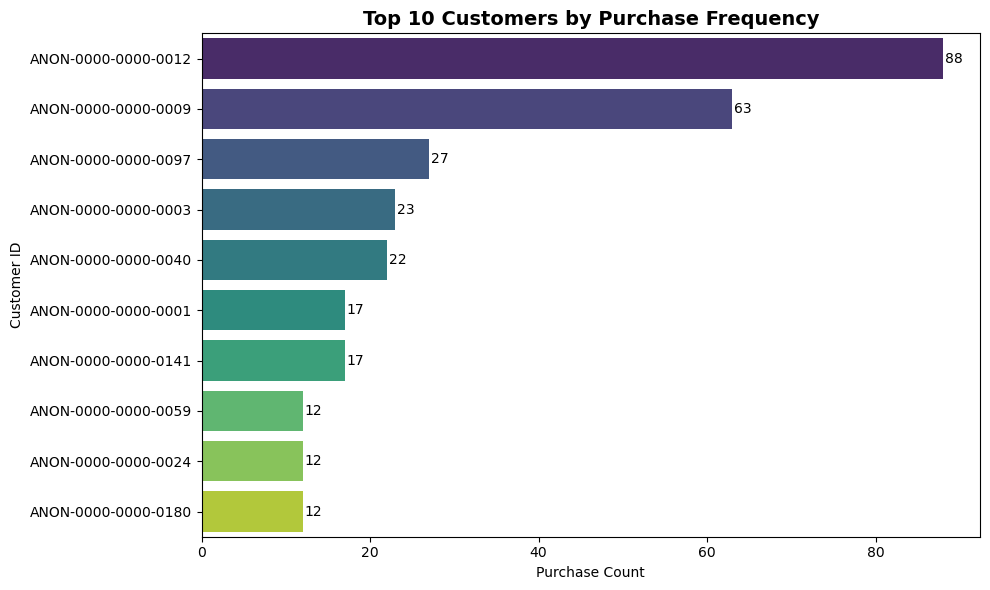

In [98]:
#Top 10 Customers by Purchase Frequency( Card Customers). These are the frequent customers
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=top_card_customers,
    x='purchase_count',
    y='customer_id',
    palette='viridis'
)

plt.title("Top 10 Customers by Purchase Frequency", fontsize=14, fontweight='bold')
plt.xlabel("Purchase Count")
plt.ylabel("Customer ID")


for p in ax.patches:
    width = p.get_width()
    ax.text(
        width + 0.2,
        p.get_y() + p.get_height() / 2,
        f"{width:.0f}",
        va='center'
    )

plt.tight_layout()
plt.show()

In [100]:
#Top revenue generating card customers
card_customers = coffee_data[coffee_data['card'] != 'CASH_USER']


top_revenue_customers = (
    card_customers.groupby('card')['transaction_amount']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
    .rename(columns={'card': 'customer_id', 'transaction_amount': 'revenue'})
)
print(top_revenue_customers)

           customer_id  revenue
0  ANON-0000-0000-0012  2593.18
1  ANON-0000-0000-0009  2212.70
2  ANON-0000-0000-0097   882.22
3  ANON-0000-0000-0040   706.36
4  ANON-0000-0000-0003   651.96
5  ANON-0000-0000-0001   646.14
6  ANON-0000-0000-0141   474.64
7  ANON-0000-0000-0180   442.84
8  ANON-0000-0000-0024   422.26
9  ANON-0000-0000-0134   405.12


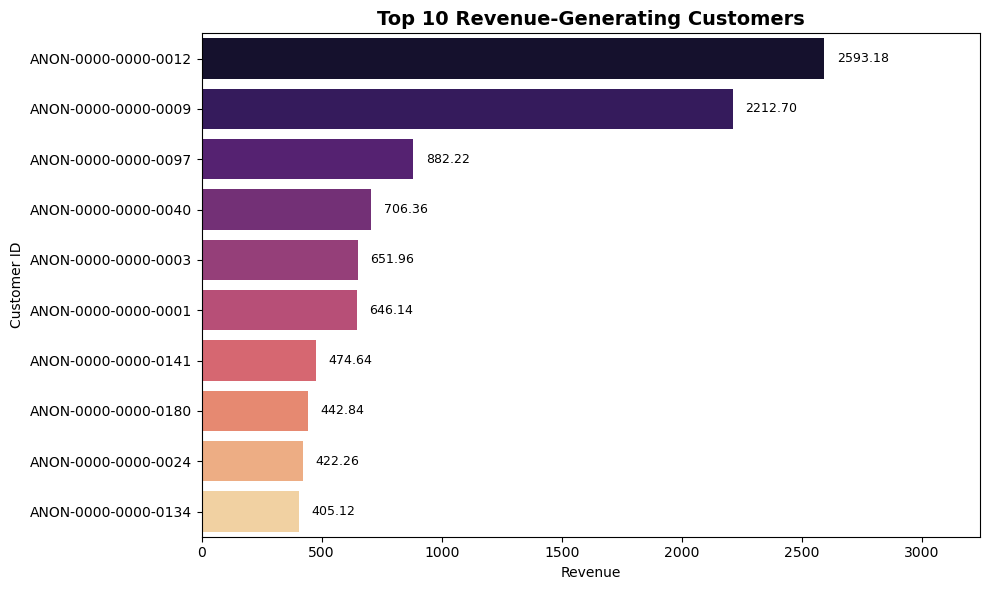

In [104]:
#Top 10 Revenue-Generating card Customers
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=top_revenue_customers,
    x='revenue',
    y='customer_id',
    palette='magma'
)

plt.title("Top 10 Revenue-Generating Customers", fontsize=14, fontweight='bold')
plt.xlabel("Revenue")
plt.ylabel("Customer ID")


max_val = top_revenue_customers['revenue'].max()
plt.xlim(0, max_val * 1.25)   


for p in ax.patches:
    width = p.get_width()
    ax.text(
        width + (max_val * 0.02),   
        p.get_y() + p.get_height() / 2,
        f"{width:.2f}",
        ha='left',      
        va='center',
        fontsize=9
    )

plt.tight_layout()
plt.show()

The top 10 card customers generate a large portion of revenue.

The highest revenue comes from ANON-0000-0000-0012 (2593.18 dollars), followed by ANON-0000-0000-0009 (2212.70 dollars).

Other top customers bring between 405–882 dollars each.

Overall, a small group of loyal card customers contributes significantly to total revenue, making them key for retention and marketing efforts.

In [107]:
# Preferred Coffee type of most frequent customers
card_customers = coffee_data[coffee_data['card'] != 'CASH_USER']


top_card_customers = (
    card_customers['card']
    .value_counts()
    .head(10)
    .reset_index()
    .rename(columns={'index': 'customer_id', 'card': 'purchase_count'})
)

top10_ids = top_card_customers['customer_id']
top10_data = card_customers[card_customers['card'].isin(top10_ids)]
preferred_coffee_each = (
    top10_data.groupby('card')['coffee_name']
    .agg(lambda x: x.value_counts().idxmax())
    .reset_index()
    .rename(columns={'card': 'customer_id', 'coffee_name': 'preferred_coffee'})
)
print(preferred_coffee_each)

           customer_id     preferred_coffee
0  ANON-0000-0000-0001                Latte
1  ANON-0000-0000-0003            Americano
2  ANON-0000-0000-0009                Latte
3  ANON-0000-0000-0012            Americano
4  ANON-0000-0000-0024  Americano with Milk
5  ANON-0000-0000-0040  Americano with Milk
6  ANON-0000-0000-0059  Americano with Milk
7  ANON-0000-0000-0097  Americano with Milk
8  ANON-0000-0000-0141              Cortado
9  ANON-0000-0000-0180           Cappuccino


In [109]:
top10_ids = top_card_customers['customer_id'].tolist()
top10_data = card_customers[card_customers['card'].isin(top10_ids)]
preferred_coffee = (
    top10_data.groupby(['card', 'coffee_name'])
    .size()
    .reset_index(name='count')
)
preferred_top = (
    preferred_coffee.loc[
        preferred_coffee.groupby('card')['count'].idxmax()
    ]
)
final_preference = top_card_customers.merge(
    preferred_top,
    left_on='customer_id',
    right_on='card',
    how='left'
).drop(columns=['card'])
final_preference = final_preference.rename(
    columns={
        'purchase_count': 'total_purchases',
        'coffee_name': 'preferred_coffee',
        'count': 'preferred_coffee_purchases'
    }
)
print(final_preference)



           customer_id  total_purchases     preferred_coffee  \
0  ANON-0000-0000-0012               88            Americano   
1  ANON-0000-0000-0009               63                Latte   
2  ANON-0000-0000-0097               27  Americano with Milk   
3  ANON-0000-0000-0003               23            Americano   
4  ANON-0000-0000-0040               22  Americano with Milk   
5  ANON-0000-0000-0001               17                Latte   
6  ANON-0000-0000-0141               17              Cortado   
7  ANON-0000-0000-0059               12  Americano with Milk   
8  ANON-0000-0000-0024               12  Americano with Milk   
9  ANON-0000-0000-0180               12           Cappuccino   

   preferred_coffee_purchases  
0                          40  
1                          23  
2                          21  
3                          17  
4                           8  
5                          17  
6                          16  
7                           7  
8      

Most frequent customers have clear coffee preferences.

ANON-0000-0000-0012 bought Americano the most (40 out of 88 purchases).

ANON-0000-0000-0009 prefers Latte, and ANON-0000-0000-0097 prefers Americano with Milk.

Many top customers repeatedly buy their favorite coffee, showing strong brand/product loyalty.

Overall, frequent customers tend to stick to one or two preferred coffee types, which can help in personalized marketing and promotions.

Columns before rename: ['customer_id', 'total_purchase_count', 'coffee_name', 'coffee_purchase_count']
Columns after rename: ['customer_id', 'total_purchase_count', 'coffee_name', 'coffee_purchase_count']


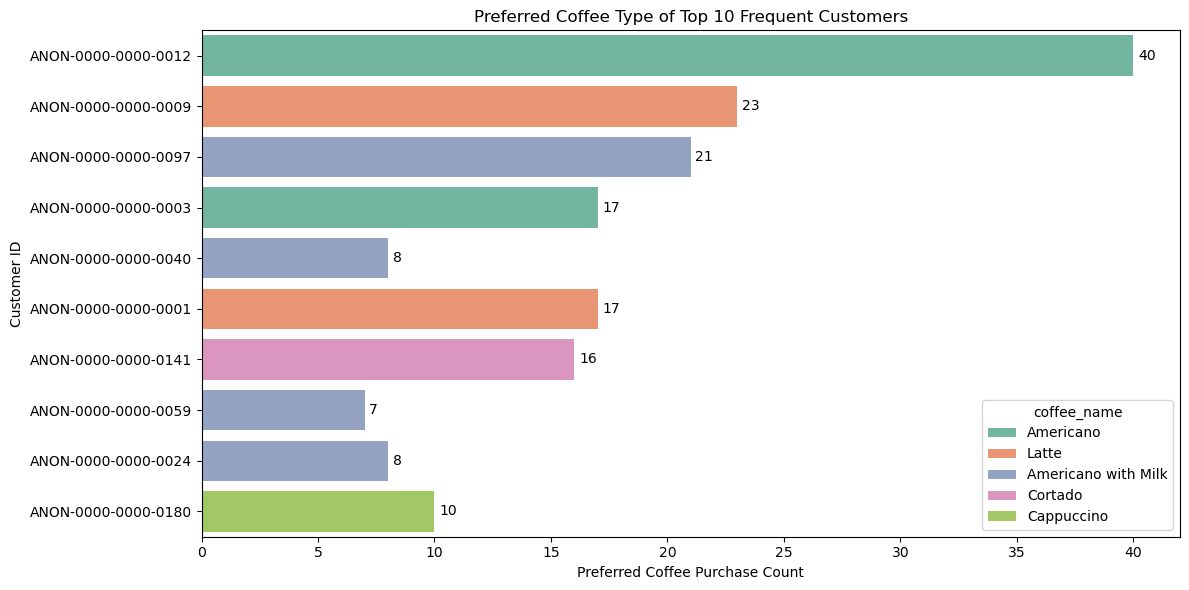

In [115]:
#Preferred Coffee Type of Top 10 Frequent Customers

print("Columns before rename:", final_preference.columns.tolist())


rename_map = {}

if 'purchase_count_x' in final_preference.columns:
    rename_map['purchase_count_x'] = 'total_purchase_count'

if 'purchase_count_y' in final_preference.columns:
    rename_map['purchase_count_y'] = 'coffee_purchase_count'

final_preference = final_preference.rename(columns=rename_map)


print("Columns after rename:", final_preference.columns.tolist())


plt.figure(figsize=(12, 6))

sns.barplot(
    data=final_preference,
    y='customer_id',
    x='coffee_purchase_count',   
    hue='coffee_name',           
    dodge=False,
    palette='Set2'
)


for index, row in final_preference.iterrows():
    plt.text(
        row['coffee_purchase_count'] + 0.2,    
        index,
        f"{row['coffee_purchase_count']:.0f}", 
        va='center'
    )

plt.xlabel("Preferred Coffee Purchase Count")
plt.ylabel("Customer ID")
plt.title("Preferred Coffee Type of Top 10 Frequent Customers")
plt.tight_layout()
plt.show()



In [116]:
# Top Average Spend per customers
card_customers = coffee_data[coffee_data['card'] != 'CASH_USER']


avg_spend = (
    card_customers.groupby('card')['transaction_amount']
    .mean()
    .reset_index()
    .rename(columns={'card': 'customer_id', 'transaction_amount': 'avg_spend'})
)


top_10_avg_spenders = avg_spend.sort_values(by='avg_spend', ascending=False).head(10)


top_10_avg_spenders['avg_spend'] = top_10_avg_spenders['avg_spend'].round(2)

print(top_10_avg_spenders)

            customer_id  avg_spend
92  ANON-0000-0000-0093       38.7
54  ANON-0000-0000-0055       38.7
28  ANON-0000-0000-0029       38.7
29  ANON-0000-0000-0030       38.7
30  ANON-0000-0000-0031       38.7
87  ANON-0000-0000-0088       38.7
86  ANON-0000-0000-0087       38.7
33  ANON-0000-0000-0034       38.7
85  ANON-0000-0000-0086       38.7
35  ANON-0000-0000-0036       38.7


The top 10 card customers spend the most on average per transaction, with each spending around 38.70 dollars.

These customers may not make the most purchases, but when they do, they buy higher-value items, making them very valuable.

Targeting these high average spenders with promotions or loyalty programs can help increase revenue.

In [119]:
avg_spend_all = coffee_data['transaction_amount'].mean()
print("Average Spend of All Customers (including CASH_USER):", avg_spend_all)
card_customers = coffee_data[coffee_data['card'] != 'CASH_USER']
avg_spend_card = card_customers['transaction_amount'].mean()

print("Average Spend of Card Customers (excluding CASH_USER):", avg_spend_card)
cash_customers = coffee_data[coffee_data['card'] == 'CASH_USER']
avg_spend_cash = cash_customers['transaction_amount'].mean()

print("Average Spend of Cash Customers (CASH_USER only):", avg_spend_cash)


Average Spend of All Customers (including CASH_USER): 33.10580759046762
Average Spend of Card Customers (excluding CASH_USER): 32.87632183908031
Average Spend of Cash Customers (CASH_USER only): 35.79775280898876


Since individual cash customers cannot be uniquely identified, the analysis compares average transaction values instead of average customer spend.
The results show that cash transactions (35.79 dollars) have a higher average value than card transactions (32.87 dollars), indicating that customers paying with cash tend to make slightly higher-value purchases per visit. Average spend per transaction is higher for cash payments than card payments.

Limitations of Analysis:

Cash customers cannot be uniquely identified.

Customer-level behaviour analysis is limited to card users only.

In [120]:
#  Top preferred coffee types by Cash User Customers
cash_users = coffee_data[coffee_data['card'] == 'CASH_USER']


cash_pref = (
    cash_users['coffee_name']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'coffee_name', 'coffee_name': 'purchase_count'})
)

print(cash_pref.head(10))   


           coffee_name  purchase_count
0                Latte              25
1  Americano with Milk              15
2           Cappuccino              15
3            Americano              14
4        Hot Chocolate               6
5              Cortado               5
6             Espresso               5
7                Cocoa               4


Latte is the most preferred coffee among cash customers, with 25 purchases.

Americano with Milk and Cappuccino are next, each with 15 purchases.

Americano, Hot Chocolate, Cortado, Espresso, and Cocoa are less popular among cash users.

Overall, cash customers mostly choose Latte, Americano with Milk, and Cappuccino.

**Findings**

1️⃣ Sales Performance by Time

🔹 Weekday Trends

Highest sales:

Tuesday, Wednesday, Thursday

Lowest sales:

Sunday & Monday

Insight:
Coffee sales are driven mainly by work-week routines. Customers are most active from Tuesday to Thursday, while demand drops at the start and end of the week.

🔹 Monthly Trends

Top months: May, June, July

Lowest month: April

Insight:
Sales rise from March to May and remain high through June–July, indicating a seasonal growth trend.

🔹 Quarterly Trends
Quarter	Sales

Q1	206

Q2	690

Q3	237

Insight:
Quarter 2 (Apr–Jun) accounts for more than 60% of total sales, making it the most critical revenue period.

2️⃣ Product Performance

🔹 Best Selling Coffee Types

Latte

Americano with Milk

Cappuccino

These three products dominate:

Hourly sales

Daily sales

Monthly sales

Revenue contribution

🔹 Low Demand Products

Espresso

Cocoa

Cortado

Hot Chocolate

These items consistently show low sales and low revenue.

3️⃣ Hourly Purchase Behaviour

🔹 Peak Hours

10 AM – 7 PM is the main sales window.

Highest peak: 10 AM (especially Latte).

Time Period	Top Coffee

Morning (6–11)	Latte

Afternoon (12–5)	Americano with Milk

Evening (6–11)	Americano with Milk / Cappuccino

4️⃣ Revenue Insights

🔹 Top Revenue Drivers

Latte → Max 1948 dollars per hour

Cappuccino → Max 1264 dollars per hour

Americano with Milk → Max 992 dollars per hour

These three products generate most of the revenue.

🔹 Weekday Revenue Leaders

Day	Top Coffee

Monday	Cappuccino

Tuesday	Americano with Milk

Wednesday	Latte

Thursday	Latte

Friday	Latte

Saturday	Americano with Milk

Sunday	Latte

🔹 Monthly Revenue Leaders

Month	Top Coffee

March	Latte

April	Cappuccino

May	Latte

June	Americano with Milk

July	Americano with Milk

5️⃣ Customer Behaviour

🔹 Loyal Customers

A small group of card customers generates a large portion of revenue.

Top customer spent 2593 dollars alone.

🔹 Purchase Pattern

Frequent buyers stick to one favourite coffee.

Most loyal preferences:

Americano

Latte

Americano with Milk

🔹 Cash vs Card

Customer Type	 Avg transaction value

Cash Users	35.80 dollars

Card Users	32.88 dollars

Insight:
Cash customers spend slightly more per transaction, but their identity is unknown. Although card users dominate the transaction volume, cash transactions have a slightly higher average bill value (35.80 dollars vs 32.88 dollars). This indicates that cash buyers tend to make marginally larger purchases per visit, even though card payments are the preferred payment method overall. Cash transactions have a higher average bill value than card transactions. However, individual cash customers cannot be identified, so customer-level behavioural analysis is not possible for cash payments.

6️⃣ Business Problems Identified

Issue &	Evidence

Low Sunday & Monday sales -->	Lowest weekday sales

Overdependence on 3 products -->	Latte, Cappuccino, Americano with Milk

Many one-time buyers -->	Many customers only made 1 purchase

Weak low-demand products -->	Espresso, Cocoa, Cortado underperform

Insight:
Latte, Cappuccino, and Americano with Milk are the top-selling coffee types because customers prefer smooth, creamy, and less bitter beverages that feel more satisfying and comfortable to drink. These drinks appeal to a wider audience, including first-time customers and casual coffee drinkers.

In contrast, Espresso, Cortado, and Cocoa show low demand because they are either too strong (Espresso), less familiar (Cortado), or not considered a core coffee choice (Cocoa), making them niche products with limited appeal.

Customers clearly favor comfort coffees over strong or unfamiliar options.

**Recommendations**

1️⃣ Boost Low-Sales Days

Run Sunday–Monday offers
Example: “Buy 1 Latte, Get Espresso at 50% Off”

2️⃣ Increase Revenue During Peak Hours

Promote combo offers between 10 AM – 5 PM
Example:
Latte + Cappuccino combo deal.

3️⃣ Improve Low Performing Products

Bundle Espresso / Cocoa / Cortado with top drinks.

Example:
Free Espresso shot with Latte above 50 dollars.

4️⃣ Retain High-Value Customers

Offer loyalty rewards to top card customers:

Free drink after every 20 purchases.

Personalized offers based on favourite coffee.

5️⃣ Convert One-Time Buyers to Loyal Customers

Provide digital loyalty card for cash users.

Encourage signup for tracking & rewards.

6️⃣ Product Strategy

Focus marketing budget on:

Latte

Americano with Milk

Cappuccino

They generate maximum revenue & repeat purchases.

#Action	& Impact

Promote Latte, Cappuccino, Americano with Milk as Signature Drinks -->	Increase repeat orders


Bundle low performers with Latte (e.g., Latte + Cocoa combo) -->	 Clear dead inventory

Rename Cortado with simple description --> 	Improve awareness

Reduce Espresso size price or make it an add-on --> 	Increase adoption